# Import Library

In [314]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from feature_engine.selection import SelectByShuffling
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import DataConversionWarning

# EDA

### Function for Explore Data Analyst

In [301]:
def read_csv(file_name):
    df = pd.read_csv(file_name)
    return df

def get_feature(df):
    df_features = df.iloc[:, 3:]
    return df_features

- read_csv to read csv files
- get_feature to retrieve features

In [12]:
df = read_csv('train.csv')

In [179]:
df.head()

,etl_date,index,label,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,...,feat_575,feat_576,feat_577,feat_578,feat_579,feat_580,feat_581,feat_582,feat_583,feat_584,feat_585,feat_586,feat_587,feat_588,feat_589,feat_590,feat_591,feat_592,feat_593,feat_594,feat_595,feat_596,feat_597,feat_598,feat_599,feat_600,feat_601,feat_602,feat_603,feat_604,feat_605,feat_606,feat_607,feat_608,feat_609,feat_610,feat_611,feat_612,feat_613,feat_614,feat_615,feat_616,feat_617,feat_618,feat_619,feat_620,feat_621,feat_622,feat_623,feat_624,feat_625,feat_626,feat_627,feat_628,feat_629,feat_630,feat_631,feat_632,feat_633,feat_634
0,2023-11-25,0,0,2465750.0,13.0,500000000,98126.0,243294.0,243294.0,552.0,1498.0,1498.0,0.0,0.0,0.0,0.005625,0.006043,0.006043,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,27.028817,26.978501,26.978501,14.0,14.0,14.0,78.0,79.0,79.0,53228.0,132771.0,132771.0,382.0,1014.0,1014.0,0.0,0.0,0.0,44134.0,108503.0,108503.0,169.0,472.0,472.0,0.0,0.0,0.0,53273.0,131766.0,131766.0,258.0,665.0,665.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,29.0
1,2023-11-25,1,0,2465750.0,13.0,500000000,98126.0,243294.0,243294.0,552.0,1498.0,1498.0,0.0,0.0,0.0,0.005625,0.006043,0.006043,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,27.028817,26.978501,26.978501,14.0,14.0,14.0,78.0,79.0,79.0,53228.0,132771.0,132771.0,382.0,1014.0,1014.0,0.0,0.0,0.0,44134.0,108503.0,108503.0,169.0,472.0,472.0,0.0,0.0,0.0,53273.0,131766.0,131766.0,258.0,665.0,665.0,...,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,26.0
2,2023-11-25,2,0,2465750.0,13.0,500000000,98126.0,243294.0,243294.0,552.0,1498.0,1498.0,0.0,0.0,0.0,0.005625,0.006043,0.006043,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,27.028817,26.978501,26.978501,14.0,14.0,14.0,78.0,79.0,79.0,53228.0,132771.0,132771.0,382.0,1014.0,1014.0,0.0,0.0,0.0,44134.0,108503.0,108503.0,169.0,472.0,472.0,0.0,0.0,0.0,53273.0,131766.0,131766.0,258.0,665.0,665.0,...,0.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,14.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,26.0
3,2023-11-25,4,0,0.0,15.0,50000000,74517.0,558911.0,558911.0,695.0,5730.0,5730.0,0.0,0.0,0.0,0.009327,0.010192,0.010192,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,23.911947,23.801315,23.801315,14.0,14.0,14.0,79.0,80.0,80.0,28403.0,213691.0,213691.0,252.0,2028.0,2028.0,0.0,0.0,0.0,45605.0,341388.0,341388.0,440.0,3680.0,3680.0,0.0,0.0,0.0,58321.0,437626.0,437626.0,549.0,4503.0,4503.0,...,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,26.0
4,2023-11-23,6,0,3412374.0,11.0,30000000,15562.0,50687.0,50687.0,848.0,2980.0,2980.0,0.0,0.0,0.0,0.054492,0.058467,0.058467,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,34.701848,34.367711,34.367711,17.0,16.0,16.0,65.0,73.0,73.0,10044.0,34373.0,34373.0,612.0,2200.0,2200.0,0.0,0.0,0.0,5514.0,16305.0,16305.0,236.0,780.0,780.0,0.0,0.0,0.0,8206.0,25261.0,25261.0,355.0,1218.0,1218.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491737 entries, 0 to 491736
Columns: 638 entries, etl_date to feat_634
dtypes: float64(618), int64(7), object(13)
memory usage: 2.3+ GB


- Data has 491737 rows, 638 columns
- Data has 3 main data types, the object data type needs to be transformed
#### Comment: Data has a large number of features - Need to reduce the number of features

In [181]:
y=df['label']

In [182]:
y

0         0
1         0
2         0
3         0
4         0
         ..
491732    0
491733    0
491734    0
491735    0
491736    0
Name: label, Length: 491737, dtype: int64

In [183]:
y.value_counts()

0    481817
1      9920
Name: label, dtype: int64

<Axes: >

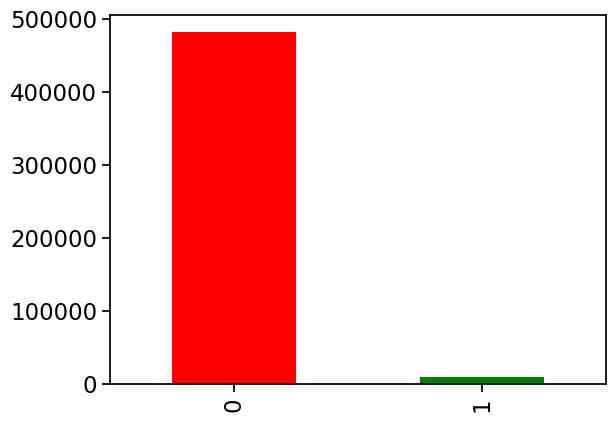

In [185]:
y.value_counts().plot.bar(color=['red', 'green'])

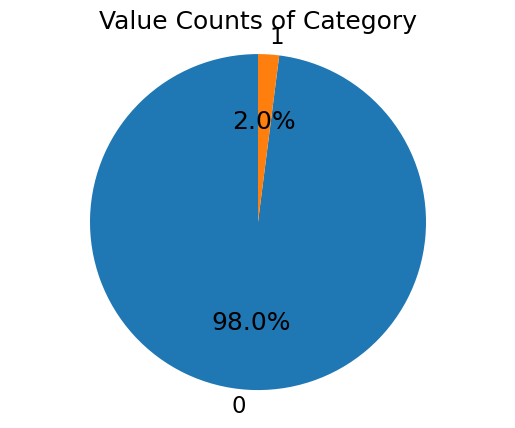

In [184]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Value Counts of Category')
plt.show()

- Data is imbalanced, 0 is Majority
- The ratio between 0 and 1 is 48.5

## Train Test Split

In [308]:
def split_data(df_features,df):
    X = df_features
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
    df_1 = X_train.copy()
    df_1['label'] = y_train
    return X_test,y_test,X_train,y_train

In [13]:
df_features = get_feature(df)
X=df_features.copy()
y=df['label']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=15, stratify=y)

# Delete Columns Have High Percent Null Values

In [305]:
def remove_high_null_columns(df):
    null_percentage = df.isnull().sum() / df.shape[0] * 100
    col_to_drop = null_percentage[null_percentage > 50].keys()
    df_remove = df.drop(col_to_drop, axis=1)
    print(f'Removed {df.shape[1]- df_remove.shape[1]} features, {df_remove.shape[1]} features left.')
    return df_remove

In [14]:
X_train.isnull().sum()

feat_0        1660
feat_1           0
feat_2           0
feat_3       47210
feat_4       45556
             ...  
feat_630     14544
feat_631    428614
feat_632    394874
feat_633    368680
feat_634     28535
Length: 635, dtype: int64

In [15]:
X_train.isnull().sum() / df.shape[0] * 100

feat_0       0.337579
feat_1       0.000000
feat_2       0.000000
feat_3       9.600661
feat_4       9.264302
              ...    
feat_630     2.957679
feat_631    87.163260
feat_632    80.301869
feat_633    74.975037
feat_634     5.802899
Length: 635, dtype: float64

In [16]:
X_train_removed_1 = remove_high_null_columns(X_train)

Removed 98 features, 537 features left.


In [17]:
X_train_removed_1.isnull().sum() / X_train_removed_1.shape[0] * 100

feat_0       0.375088
feat_1       0.000000
feat_2       0.000000
feat_3      10.667408
feat_4      10.293676
              ...    
feat_627     3.286312
feat_628    42.667146
feat_629    12.504886
feat_630     3.286312
feat_634     6.447670
Length: 537, dtype: float64

# Delete Columns with High Percent 0 Values

In [306]:
def remove_high_zero_value(df):
    zero_percentage = df.apply(lambda x: (x == 0).sum() / len(x) * 100)
    col_to_drop = zero_percentage[zero_percentage > 80].keys()
    df_remove = df.drop(col_to_drop, axis=1)
    print(f'Removed {df.shape[1]- df_remove.shape[1]} features, {df_remove.shape[1]} features left.')
    return df_remove

In [18]:
X_train_removed_1.apply(lambda x: (x == 0).sum() / len(x) * 100)

feat_0      32.695232
feat_1       0.796949
feat_2       0.000000
feat_3       0.000000
feat_4       0.000000
              ...    
feat_627    95.842174
feat_628    57.332854
feat_629    87.495114
feat_630    96.713688
feat_634     0.000000
Length: 537, dtype: float64

In [19]:
X_train_removed_2 = remove_high_zero_value(X_train_removed_1)

Removed 196 features, 341 features left.


In [20]:
X_train_removed_2.apply(lambda x: (x == 0).sum() / len(x) * 100)

feat_0      32.695232
feat_1       0.796949
feat_2       0.000000
feat_3       0.000000
feat_4       0.000000
              ...    
feat_622    54.180987
feat_623    76.719473
feat_625    57.253770
feat_628    57.332854
feat_634     0.000000
Length: 341, dtype: float64

# Handle Characteric Value

- The structure of the characters is "type_number" so the number is retained
- However, each column has a different number of types, just keep the columns with few features, columns with many features will use the binning method.

In [307]:
def handle_char(x):
    x=x.copy()
    object_columns = x.select_dtypes(include='object').columns
    for col in object_columns:
        x[col] = pd.to_numeric(x[col].astype(str).str.extract('(\d+)', expand=False), errors='coerce',downcast='integer')

    bins = [0, 1, 2, 4, 6, 10]
    labels = [0, 1, 2, 3, 4]
    x['feat_169'] = pd.cut(x['feat_169'], bins=bins, labels=labels, right=False).cat.codes.astype(int)

    bins = [0, 1, 4, 10]
    labels = [0, 1, 2]
    x['feat_170'] = pd.cut(x['feat_170'], bins=bins, labels=labels, right=False).cat.codes.astype(int)

    bins = [0, 10, 20, 30, 60]
    labels = [0, 1, 2, 3]
    x['feat_171'] = pd.cut(x['feat_171'], bins=bins, labels=labels, right=False).cat.codes.astype(int)

    bins = [0, 5, 10, 35]
    labels = [0, 1, 2]
    x['feat_175'] = pd.cut(x['feat_175'], bins=bins, labels=labels, right=False).cat.codes.astype(int)

    return x

<>:5: DeprecationWarning: invalid escape sequence \d
<>:5: DeprecationWarning: invalid escape sequence \d
C:\Users\ngois\AppData\Local\Temp\ipykernel_10280\3325658429.py:5: DeprecationWarning: invalid escape sequence \d
  x[col] = pd.to_numeric(x[col].astype(str).str.extract('(\d+)', expand=False), errors='coerce',downcast='integer')


In [88]:
X_train_removed_2.select_dtypes(include=['object'])

,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_179
454337,type_0,type_5,type_0,type_1,type_0,type_2,type_0,type_1,type_0,type_0,type_0
376898,type_1,type_0,type_3,type_2,type_1,type_0,type_0,type_5,type_1,type_1,type_0
346954,type_0,type_1,type_2,type_3,type_0,type_5,type_1,type_10,type_0,type_0,type_0
422601,type_0,type_2,type_2,type_3,type_0,type_4,type_1,type_3,type_0,type_1,type_1
229459,type_0,type_2,type_5,type_9,type_0,type_6,type_0,type_0,type_0,type_0,type_0
...,...,...,...,...,...,...,...,...,...,...,...
262592,type_0,type_3,type_0,type_1,type_0,type_4,type_0,type_1,type_0,type_1,type_1
106631,type_0,type_0,type_3,type_2,type_1,type_2,type_0,type_1,type_0,type_0,type_1
138126,type_0,type_5,type_5,type_9,type_0,type_2,type_0,type_7,type_0,type_0,type_1
379892,type_0,type_1,type_0,type_17,type_0,type_5,type_0,type_1,type_0,type_0,type_1


In [21]:
X_train_char = handle_char(X_train_removed_2)

In [87]:
X_train_char.select_dtypes(include=['object'])

""
454337
376898
346954
422601
229459
...
262592
106631
138126
379892


In [86]:
X_train_char

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_72,feat_73,feat_74,...,feat_518,feat_521,feat_526,feat_527,feat_528,feat_529,feat_530,feat_531,feat_533,feat_539,feat_540,feat_541,feat_542,feat_545,feat_549,feat_550,feat_551,feat_552,feat_553,feat_554,feat_555,feat_556,feat_557,feat_561,feat_562,feat_563,feat_564,feat_565,feat_566,feat_569,feat_574,feat_575,feat_576,feat_577,feat_578,feat_581,feat_586,feat_587,feat_588,feat_589,feat_590,feat_593,feat_598,feat_599,feat_600,feat_601,feat_602,feat_605,feat_609,feat_610,feat_611,feat_612,feat_613,feat_614,feat_617,feat_622,feat_623,feat_625,feat_628,feat_634
454337,10531052.0,4.0,6.600000e+11,533860.0,533860.0,533860.0,461.0,461.0,461.0,0.000864,0.000864,0.000864,11.000000,11.000000,11.000000,11.0,11.0,11.0,11.0,11.0,11.0,27.024192,27.024192,27.024192,14.0,14.0,14.0,80.0,80.0,80.0,291832.0,291832.0,291832.0,308.0,308.0,308.0,240439.0,240439.0,240439.0,150.0,150.0,150.0,288953.0,288953.0,288953.0,159.0,159.0,159.0,0.000550,0.000550,0.000550,244907.0,244907.0,244907.0,302.0,302.0,302.0,0.001233,0.001233,0.001233,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.000000,0.000000,13.0,9.8,36.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,5.0,0.0,0.0,0.00,0.2,2.0,0.0,0.0,0.0,0.000000,0.8,0.2,3.0,0.0,0.0,0.000000,4.0,1.4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,16.0
376898,3609668.0,7.0,5.000000e+07,7720.0,26782.0,26782.0,183.0,580.0,580.0,0.023705,0.021631,0.021631,11.000000,11.000000,11.000000,11.0,11.0,11.0,11.0,11.0,11.0,31.798757,31.458222,31.458222,15.0,15.0,15.0,57.0,66.0,66.0,4612.0,16190.0,16190.0,121.0,388.0,388.0,3106.0,10589.0,10589.0,62.0,192.0,192.0,4400.0,14964.0,14964.0,55.0,162.0,162.0,0.012500,0.010519,0.010519,3320.0,11818.0,11818.0,128.0,418.0,418.0,0.038554,0.035550,0.035550,...,0.0,0.0,0.000000,1.2,0.0,0.0,0.0,0.0,0.0,1.4,15.0,36.0,0.0,0.0,0.000000,0.000000,9.4,53.0,177.0,0.2,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.00,1.0,1.0,3.0,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.040000,1.0,2.0,6.0,0.0,0.0,0.0,0.000000,0.4,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,28.0
346954,0.0,2.0,1.000000e+09,3694242.6,5795256.2,5844452.2,26582.8,45409.0,47998.0,0.016204,0.015972,0.017579,24.400000,24.400000,24.400000,24.4,24.4,24.4,24.4,24.4,24.4,26.513988,26.526663,26.545774,14.0,14.0,14.0,79.4,79.6,79.6,1935132.6,3052089.0,3082239.6,13627.0,24130.2,25750.0,1735775.6,2703936.6,2722351.8,12737.4,20812.0,21758.8,2517396.6,3892610.0,3915177.2,12654.6,20875.8,21745.2,0.013489,0.013147,0.014315,1176846.0,1902646.2,1929275.0,13928.2,24533.2,26252.8,0.020350,0.020195,0.022124,...,0.0,0.0,0.142857,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.006667,0.000000,0.0,1.0,88.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,3.0,31.0,0.0,0.0,0.00,1.0,1.0,14.0,0.0,0.0,0.000000,0.0,2.0,16.0,0.0,0.0,0.000000,1.0,4.0,16.0,0.0,0.0,0.0,0.071429,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
422601,0.0,3.0,1.000000e+09,373886.0,474721.0,474721.0,9490.0,12062.0,12062.0,0.025382,0.025445,0.025445,14.000000,14.000000,14.000000,14.0,14.0,14.0,14.0,14.0,14.0,27.216753,27.036403,27.036403,14.0,14.0,14.0,79.0,79.0,79.0,208517.0,265405.0,265405.0,4401.0,5732.0,5732.0,156701.0,198221.0,198221.0,4906.0,6095.0,6095.0,194742.0,245426.0,245426.0,4954.0,6158.0,6158.0,0.025439,0.024597,0.024597,179144.0,229295.0,229295.0,4536.0,5904.0,5904.0,0.025320,0.026299,0.026299,...,0.0,0.0,0.000000,0.0,31.0,31.0,0.0,3.0,0.0,0.2,6.0,7.0,0.0,0.0,0.166667,0.083333,7.0,8.0,14.0,0.0,3.0,4.0,0.0,0.214286,0.198413,0.2,0.0,0.0,0.0,0.0,0.00,0.2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.2,5.0,8.0,0.0,0.0,0.0,0.000

# Handle Null Value

In [309]:
def handle_null(df):
    batch_size = 1000
    num_samples = df.shape[0]
    num_batches = int(np.ceil(num_samples / batch_size))
    print(num_batches)
    imputer = KNNImputer()

    for i in range(num_batches):
        if i % 10 == 0:
            print(i)
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, num_samples)

        batch_df = df.iloc[start_idx:end_idx, :]

        imputer.fit(batch_df)
        imputed_batch = imputer.transform(batch_df)

        df.iloc[start_idx:end_idx, :] = imputed_batch
    return df

- Data has large data so you should not use common methods of replacing null values
- Recommended method: Using KNN

In [22]:
X_train_char.isnull().sum()

feat_0        1660
feat_1           0
feat_2           0
feat_3       47210
feat_4       45556
             ...  
feat_622    188829
feat_623     55342
feat_625    188829
feat_628    188829
feat_634     28535
Length: 341, dtype: int64

In [23]:
X_train_null=handle_null(X_train_char)

443
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440


# Handle Outlier

In [124]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [125]:
features=X_train_null.columns
for i in features:
    X_train_null[i]= BoxplotOutlierClipper().fit_transform(X_train_null[i])

# Select Feature

## Select by Variance

In [310]:
def variance(df):

    selector = VarianceThreshold()
    selector.fit(df)
    mask = selector.get_support()
    columns = df.columns
    selected_cols = columns[mask]
    print(f'Removed {len(columns)- len(selected_cols)} features, {len(selected_cols)} features left.')
    
    return selector, selected_cols

In [126]:
selector, selected_cols=variance(X_train_null)
X_train_var = pd.DataFrame(selector.transform(X_train_null), columns = selected_cols)

Removed 132 features, 209 features left.


## Select by Correlation

In [311]:
def correlation(dataset,corr_matrix, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    df_remove=dataset.drop(col_corr, axis=1)
    print(f'Removed {dataset.shape[1]- df_remove.shape[1]} features, {df_remove.shape[1]} features left.')
    return col_corr,df_remove

In [127]:
corr_matrix = X_train_var.corr()
corr_matrix

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_72,feat_73,feat_74,feat_75,feat_76,...,feat_329,feat_363,feat_364,feat_365,feat_368,feat_374,feat_389,feat_398,feat_399,feat_400,feat_403,feat_408,feat_409,feat_422,feat_423,feat_424,feat_443,feat_456,feat_457,feat_467,feat_468,feat_469,feat_491,feat_492,feat_493,feat_503,feat_504,feat_505,feat_515,feat_516,feat_517,feat_527,feat_528,feat_529,feat_539,feat_540,feat_541,feat_550,feat_551,feat_552,feat_553,feat_556,feat_562,feat_563,feat_564,feat_565,feat_574,feat_575,feat_576,feat_577,feat_587,feat_588,feat_589,feat_599,feat_600,feat_601,feat_611,feat_612,feat_613,feat_634
feat_0,1.000000,0.137124,0.299777,0.083207,0.009851,-0.063460,-0.119350,-0.109353,-0.091924,-0.131839,-0.147340,-0.159560,0.045803,0.041690,0.040163,0.053375,0.054741,0.054628,-0.025556,-0.026014,-0.023682,-0.259458,-0.259917,-0.266194,-0.022761,-0.063132,-0.039519,0.054188,0.087442,0.013870,-0.061658,-0.113064,-0.100848,-0.078153,0.082988,0.007830,-0.064212,-0.119850,-0.109851,-0.100222,0.075695,-0.002360,-0.065436,-0.101338,-0.086740,-0.079130,-0.134197,-0.147778,-0.171350,0.101100,0.027764,-0.057090,-0.128017,-0.105765,-0.089321,-0.119866,-0.141136,-0.130236,0.003635,0.018176,...,-0.086259,-0.075048,-0.069130,-0.064017,-0.078803,-0.070331,-0.043448,-0.031082,-0.043139,-0.038245,-0.052387,-0.057464,-0.055378,0.067949,0.059656,0.070916,-0.184318,0.024633,0.029773,0.108840,0.087587,0.069955,-0.005137,-0.018223,-0.015904,-0.049051,-0.064436,-0.057800,0.007773,-0.009602,-0.024630,-0.188327,-0.165172,-0.156093,-0.077906,-0.077795,-0.065164,-0.032465,0.030859,-0.000146,-0.007970,-0.041048,-0.048206,-0.010527,-0.011594,-0.003525,-0.054529,-0.013856,-0.022870,-0.023265,0.021589,0.011687,0.032992,-0.009427,-0.038982,-0.063092,-0.042852,-0.050399,-0.024443,-0.083113
feat_1,0.137124,1.000000,0.263877,0.002296,0.135719,0.295390,0.068535,0.166220,0.334409,0.019530,0.017110,0.005542,0.035143,0.028626,0.027780,0.013147,0.014364,0.014550,0.010584,0.009646,0.012184,-0.056640,-0.044266,-0.031458,0.084697,-0.041014,0.029145,0.132069,-0.007605,0.125199,0.293128,0.081805,0.177693,0.346772,0.015235,0.148099,0.297142,0.050053,0.144735,0.313235,0.013628,0.147971,0.283742,0.023999,0.110383,0.301678,-0.088602,-0.088693,-0.071461,-0.016762,0.121774,0.308175,0.093061,0.186409,0.338807,0.140639,0.126325,0.074005,-0.043545,-0.018512,...,0.075526,-0.006735,0.011381,0.011828,-0.002200,-0.004919,0.017162,-0.019702,0.006335,0.009831,-0.005430,-0.014931,-0.010978,0.017940,0.020448,0.018298,-0.020044,-0.016008,-0.002643,-0.020437,-0.019152,-0.015334,-0.030009,-0.022642,-0.009464,-0.048497,-0.012225,-0.009812,-0.014489,0.000134,0.010490,-0.022802,-0.020658,-0.012803,0.079188,0.100218,0.094309,-0.006422,0.003146,0.016055,0.011631,0.000363,-0.005608,-0.022149,-0.003822,0.002147,-0.030401,-0.015712,-0.000726,0.010927,-0.014096,0.000508,0.006158,-0.007315,0.008698,0.004248,-0.040301,-0.022913,-0.007947,-0.011910
feat_2,0.299777,0.263877,1.000000,0.657952,0.679687,0.643727,0.564948,0.601761,0.630379,-0.178784,-0.168686,-0.185458,0.567709,0.558471,0.555288,0.544798,0.547034,0.547615,0.477783,0.477905,0.488036,-0.186622,-0.178647,-0.177595,-0.270794,0.365586,0.355575,0.383641,0.655480,0.677941,0.647576,0.568552,0.605312,0.636758,0.661398,0.680281,0.636774,0.562104,0.602631,0.627441,0.655009,0.667367,0.633545,0.571829,0.609254,0.639443,-0.214238,-0.207442,-0.226374,0.658731,0.687504,0.657642,0.556140,0.605090,0.630346,-0.107842,-0.104623,-0.131408,0.499355,0.499342,...,-0.096767,-0.042527,-0.041451,-0.031336,-0.090788,-0.094471,-0.100096,-0.065088,-0.062130,-0.060141,-0.08

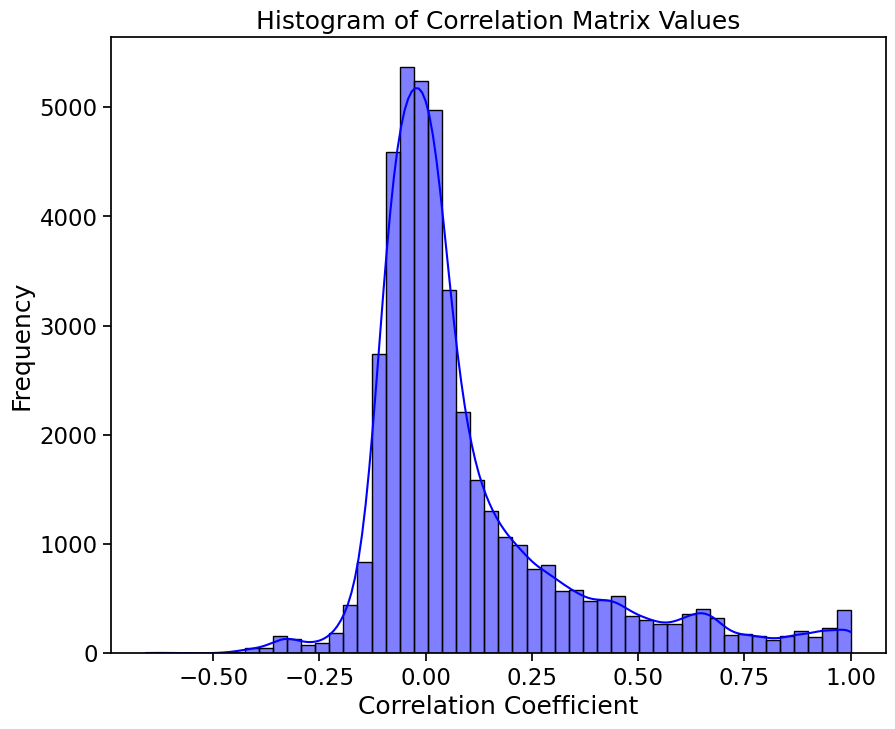

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.histplot(corr_matrix.values.flatten(), bins=50, kde=True, color='blue')
plt.title('Histogram of Correlation Matrix Values')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

In [129]:
corr_features, X_train_corr = correlation(X_train_var,corr_matrix, 0.95)

Removed 49 features, 160 features left.


## Select By Lasso

In [312]:
def lasso(X_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    lasso = SelectFromModel(Lasso(alpha=0.0005, random_state=10))  
    lasso.fit(X_train_scaled, y_train)
    selected_feat=X_train_corr.columns[(lasso.get_support())]
    print('selected features: {}'.format(len(selected_feat)))
    print('feature with coefficients shrank to zero: {}'.format(np.sum(lasso.estimator_.coef_== 0)))
    return selected_feat

In [130]:
selected_feat=lasso(X_train_corr)

selected features: 53
feature with coefficients shrank to zero: 107


In [131]:
X_train_lasso=X_train_corr[selected_feat]

In [132]:
X_train_lasso

,feat_1,feat_4,feat_6,feat_15,feat_60,feat_61,feat_72,feat_73,feat_168,feat_169,feat_171,feat_177,feat_179,feat_182,feat_183,feat_184,feat_199,feat_200,feat_202,feat_204,feat_207,feat_208,feat_209,feat_223,feat_230,feat_246,feat_249,feat_250,feat_251,feat_256,feat_257,feat_260,feat_290,feat_302,feat_327,feat_363,feat_364,feat_365,feat_368,feat_409,feat_423,feat_457,feat_469,feat_515,feat_529,feat_539,feat_541,feat_562,feat_564,feat_576,feat_577,feat_600,feat_634
0,4.0,533860.0,461.0,11.0,0.000550,0.000550,0.001233,0.001233,0.0,3.0,0.0,0.0,0.0,1817.0,6.0,75.666667,56.750000,1.750000,56.750000,1.000000,5.625000,119.000000,238.000000,774000.0,4569000.00,22.8,0.0,0.0,0.0,0.000000,0.000000,16.833333,0.000000,0.000000,1.0,9.6,9.0,12.0,0.0,0.028111,1.8,0.0,22.0,2.5,0.0,0.4,0.0,0.000000,1.0,2.0,0.0,1.4,16.0
1,7.0,26782.0,183.0,11.0,0.012500,0.010519,0.038554,0.035550,1.0,0.0,0.0,1.0,0.0,2773.0,2.0,37.000000,27.750000,1.000000,106.857143,2.285714,14.857143,1086.000000,8836.000000,14970712.0,16531948.15,20.2,0.2,0.0,0.0,0.000000,0.000000,32.009346,0.000000,0.012500,2.6,9.0,47.0,138.0,0.0,0.000000,4.0,0.0,6.0,0.4,0.0,1.4,36.0,0.000000,1.0,1.0,3.0,2.0,28.0
2,2.0,3011636.5,7729.5,24.4,0.013489,0.013147,0.020350,0.020195,0.0,1.0,0.0,0.0,0.0,484.0,6.0,130.000000,39.000000,2.200000,143.562500,2.562500,15.437500,23684.666667,6.000000,2684900.0,11397677.00,3.0,0.0,0.0,5.0,0.000000,0.009414,15.593496,0.047059,0.000000,0.0,0.0,13.0,21.0,0.0,0.028111,7.0,5.0,13.0,0.0,7.0,0.0,31.0,0.000000,2.5,1.0,14.0,4.0,20.0
3,3.0,474721.0,7729.5,14.0,0.025439,0.024597,0.025320,0.026299,0.0,2.0,0.0,1.0,1.0,1552.0,2.0,159.333333,119.500000,2.250000,119.500000,1.000000,4.285714,143.000000,237.333333,5760785.2,8815233.20,9.6,0.0,2.5,7.5,0.023250,0.036146,22.317063,0.000000,0.012500,0.6,7.2,13.0,16.0,2.5,0.028111,2.0,0.0,0.0,0.0,15.0,0.2,7.0,0.025240,0.0,0.0,0.0,5.0,29.0
4,9.0,5157.0,48.0,14.0,0.007019,0.007900,0.024055,0.026573,0.0,2.0,0.0,0.0,0.0,1459.0,1.0,24.666667,9.250000,1.000000,52.500000,2.800000,9.250000,1515.000000,1010.000000,4655130.8,5200132.00,3.0,0.0,0.0,0.0,0.000000,0.000000,11.098214,0.000000,0.000000,3.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,9.0,0.000000,0.0,0.0,0.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442558,10.0,13939.0,88.0,11.0,0.009675,0.013648,0.013286,0.010735,0.0,2.0,0.0,1.0,1.0,456.0,1.0,570.166667,163.268530,4.400000,279.600000,1.700000,12.571429,23510.666667,5096.000000,203600.0,302500.00,43.8,0.5,2.0,6.0,0.019231,0.036146,20.350875,0.000000,0.008333,5.0,8.0,9.0,23.0,2.5,0.000000,3.0,0.0,6.0,2.5,3.0,0.0,13.0,0.025240,1.0,7.0,7.0,5.0,18.0
442559,11.0,84499.0,671.0,11.0,0.016510,0.013341,0.047515,0.029586,0.0,0.0,0.0,0.0,1.0,1235.0,3.0,252.000000,50.400000,3.000000,458.523810,5.800000,12.500000,7207.000000,15138.000000,4065000.0,1768000.00,8.0,0.0,2.5,6.0,0.020696,0.007304,30.266345,0.000000,0.012500,0.0,3.0,64.0,182.0,2.0,0.006723,11.5,1.0,22.0,2.0,0.0,0.0,2.0,0.004686,1.0,7.0,9.0,12.5,24.0
442560,8.0,1472901.0,1006.0,11.0,0.001249,0.001276,0.002335,0.002333,0.0,3.0,0.0,0.0,1.0,2128.0,4.0,570.166667,144.373626,4.879121,458.523810,2.758242,15.620879,288.333333,44946.000000,13395839.0,1288839.00,4.0,0.0,0.0,0.0,0.000000,0.000000,16.366071,0.049107,0.000000,0.0,0.0,4.0,12.0,0.0,0.028111,1.0,4.0,25.0,2.5,0.0,0.0,0.0,0.000000,0.0,0.0,4.0,1.0,34.0
442561,25.0,170565.0,1781.0,38.5,0.031778,0.030023,0.060245,0.056375,0.0,1.0,1.0,0.0,1.0,1636.0,4.0,46.333333,34.750000,1.000000,34.750000,1.000000,4.333333,0.000000,0.000000,904666.6,117000.00,24.0,0.0,0.0,0.0,0.000000,0.000000,41.000000,0.000000,0.000000,1.6,14.0,8.6,2.0,0.0,0.000000,1.6,0.0,0.0,0.8,0.0,1.6,0.0,0.000000,0.2,0.0,0.0,0.2,20.0


# Select By Shuffle

In [313]:
def shuffle(X_train, y_train):
    rf=RandomForestClassifier(
        n_estimators=10,
        random_state=42)
    shuf=SelectByShuffling(
        estimator=rf,
        scoring='roc_auc',
        threshold=0,
        cv=3,
        random_state=1)
    shuf.fit(X_train,y_train)
    print('initial model performance:',shuf.initial_model_performance_)
    pd.Series(shuf.performance_drifts_).plot.bar(figsize=(20,6))
    plt.title('Performance change after shuffing feature')
    plt.ylabel('ROC-AUC change when feature was shuffed')
    plt.show()
    print(f'Removed {len(shuf.features_to_drop_)} features, {X_train.shape[1]-len(shuf.features_to_drop_)} features left.')
    X_train_shuf=shuf.transform(X_train)
    return X_train_shuf

In [133]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
442558    0
442559    0
442560    0
442561    0
442562    0
Name: label, Length: 442563, dtype: int64

In [134]:
y_train = y_train.reset_index(drop=True)

In [135]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
442558    0
442559    0
442560    0
442561    0
442562    0
Name: label, Length: 442563, dtype: int64

initial model performance: 0.6252078845142668


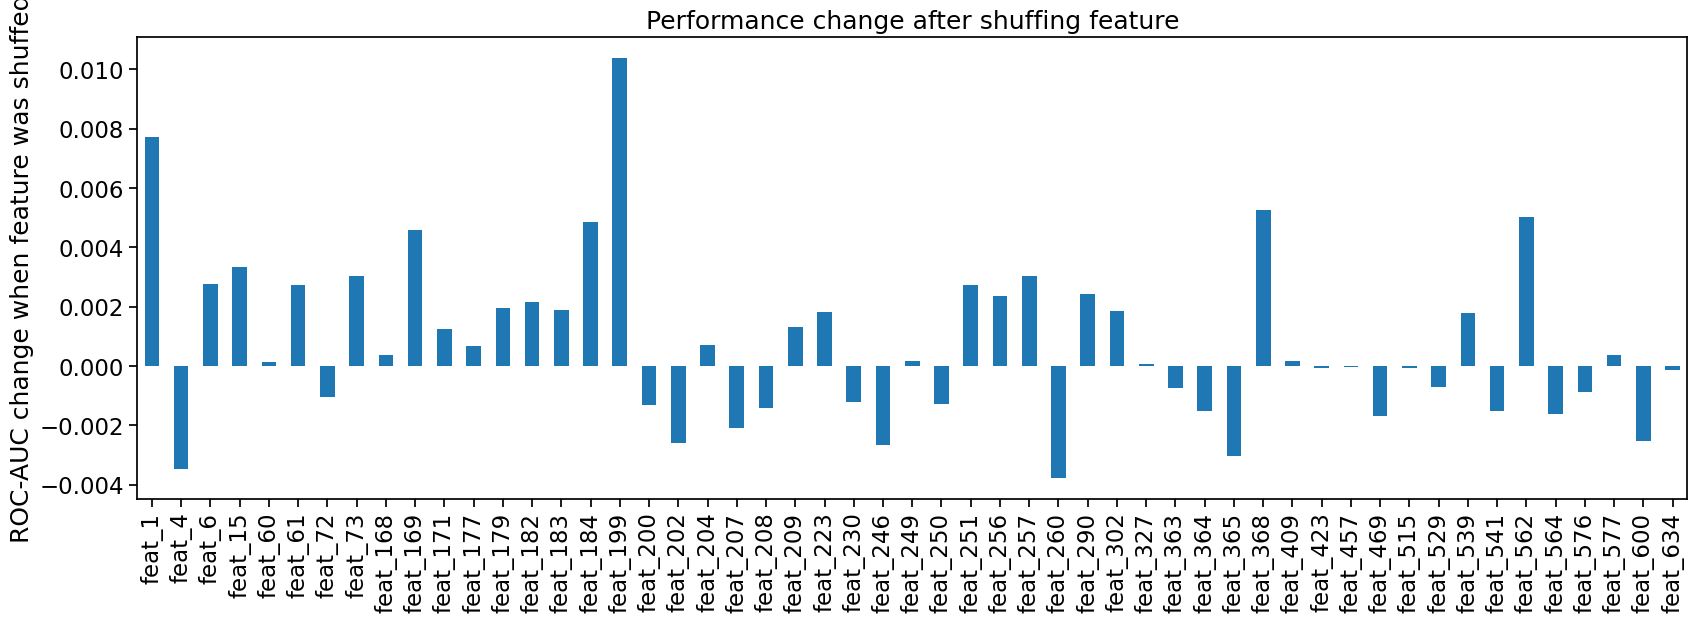

Removed 31 features, 22 features left.


In [136]:
X_train_shuf=shuffle(X_train_lasso, y_train)

In [137]:
X_train_shuf

,feat_1,feat_6,feat_15,feat_61,feat_73,feat_169,feat_171,feat_179,feat_182,feat_183,feat_184,feat_199,feat_209,feat_223,feat_251,feat_256,feat_257,feat_290,feat_302,feat_368,feat_539,feat_562
0,4.0,461.0,11.0,0.000550,0.001233,3.0,0.0,0.0,1817.0,6.0,75.666667,56.750000,238.000000,774000.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.4,0.000000
1,7.0,183.0,11.0,0.010519,0.035550,0.0,0.0,0.0,2773.0,2.0,37.000000,27.750000,8836.000000,14970712.0,0.0,0.000000,0.000000,0.000000,0.012500,0.0,1.4,0.000000
2,2.0,7729.5,24.4,0.013147,0.020195,1.0,0.0,0.0,484.0,6.0,130.000000,39.000000,6.000000,2684900.0,5.0,0.000000,0.009414,0.047059,0.000000,0.0,0.0,0.000000
3,3.0,7729.5,14.0,0.024597,0.026299,2.0,0.0,1.0,1552.0,2.0,159.333333,119.500000,237.333333,5760785.2,7.5,0.023250,0.036146,0.000000,0.012500,2.5,0.2,0.025240
4,9.0,48.0,14.0,0.007900,0.026573,2.0,0.0,0.0,1459.0,1.0,24.666667,9.250000,1010.000000,4655130.8,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442558,10.0,88.0,11.0,0.013648,0.010735,2.0,0.0,1.0,456.0,1.0,570.166667,163.268530,5096.000000,203600.0,6.0,0.019231,0.036146,0.000000,0.008333,2.5,0.0,0.025240
442559,11.0,671.0,11.0,0.013341,0.029586,0.0,0.0,1.0,1235.0,3.0,252.000000,50.400000,15138.000000,4065000.0,6.0,0.020696,0.007304,0.000000,0.012500,2.0,0.0,0.004686
442560,8.0,1006.0,11.0,0.001276,0.002333,3.0,0.0,1.0,2128.0,4.0,570.166667,144.373626,44946.000000,13395839.0,0.0,0.000000,0.000000,0.049107,0.000000,0.0,0.0,0.000000
442561,25.0,1781.0,38.5,0.030023,0.056375,1.0,1.0,1.0,1636.0,4.0,46.333333,34.750000,0.000000,904666.6,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.6,0.000000


## Processing X_test

In [138]:
X_test[X_train_shuf.columns]

,feat_1,feat_6,feat_15,feat_61,feat_73,feat_169,feat_171,feat_179,feat_182,feat_183,feat_184,feat_199,feat_209,feat_223,feat_251,feat_256,feat_257,feat_290,feat_302,feat_368,feat_539,feat_562
152625,29,3942.0,40.980603,0.008175,0.019881,type_1,type_0,type_0,768,2,354.000000,70.800000,833.333333,10017750.0,1.0,0.002924,0.001253,NaN,0.000000,1.0,1.0,0.000000
191613,34,22.0,31.000000,0.013260,0.015988,type_2,type_16,type_1,407,1,229.666667,57.416667,217.333333,NaN,17.0,0.000000,0.057196,0.060714,0.011905,8.0,0.0,0.155994
225726,29,8932.0,40.994322,0.007852,0.019645,type_1,type_0,type_0,836,2,93.000000,34.875000,0.000000,500000.0,0.0,0.000000,0.000000,NaN,NaN,0.0,0.0,0.000000
233999,29,12524.0,40.998505,0.007049,0.017675,type_1,type_0,type_1,747,1,139.000000,34.100000,0.000000,7100000.0,3.0,0.000000,0.011559,0.000000,0.000000,1.0,0.0,0.012500
437258,29,8771.0,40.994333,0.007489,0.018606,type_1,type_0,type_0,1186,2,49.666667,18.625000,242570.666667,NaN,0.0,0.000000,0.000000,NaN,0.000000,0.0,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434886,18,991.0,11.000000,0.037140,0.025050,type_3,type_2,type_1,168,1,9.000000,6.750000,2680.000000,NaN,0.0,0.000000,0.000000,NaN,NaN,0.0,NaN,0.000000
443185,45,18.0,11.000000,0.012210,0.015008,type_0,type_2,type_0,3185,31,98.666667,32.888889,1053.000000,306000.0,2.0,0.055556,0.038194,0.000000,0.000000,0.0,NaN,0.000000
491425,31,NaN,NaN,NaN,NaN,type_0,type_2,type_0,1533,2,129.000000,48.375000,39122.666667,546000.0,0.0,NaN,0.000000,NaN,0.000000,0.0,NaN,0.000000
232886,15,431.0,11.000000,0.013912,0.040958,type_0,type_6,type_0,809,1,287.000000,86.100000,7018.000000,3165000.0,1.0,0.022222,0.008547,0.000000,0.000000,0.0,0.0,0.000000


In [139]:
X_test_char = handle_char(X_test)

In [140]:
X_train_shuf.columns

Index(['feat_1', 'feat_6', 'feat_15', 'feat_61', 'feat_73', 'feat_169',
       'feat_171', 'feat_179', 'feat_182', 'feat_183', 'feat_184', 'feat_199',
       'feat_209', 'feat_223', 'feat_251', 'feat_256', 'feat_257', 'feat_290',
       'feat_302', 'feat_368', 'feat_539', 'feat_562'],
      dtype='object')

In [141]:
X_test_shuf=X_test_char[X_train_shuf.columns]

In [142]:
X_test_shuf.select_dtypes(include=['object'])

""
152625
191613
225726
233999
437258
...
434886
443185
491425
232886


In [143]:
X_test_shuf=handle_null(X_test_shuf)

50
0
10
20
30
40


In [144]:
X_test_shuf.isnull().sum()

feat_1      0
feat_6      0
feat_15     0
feat_61     0
feat_73     0
feat_169    0
feat_171    0
feat_179    0
feat_182    0
feat_183    0
feat_184    0
feat_199    0
feat_209    0
feat_223    0
feat_251    0
feat_256    0
feat_257    0
feat_290    0
feat_302    0
feat_368    0
feat_539    0
feat_562    0
dtype: int64

In [145]:
X_test_shuf

,feat_1,feat_6,feat_15,feat_61,feat_73,feat_169,feat_171,feat_179,feat_182,feat_183,feat_184,feat_199,feat_209,feat_223,feat_251,feat_256,feat_257,feat_290,feat_302,feat_368,feat_539,feat_562
152625,29.0,3942.0,40.980603,0.008175,0.019881,1.0,0.0,0.0,768.0,2.0,354.000000,70.800000,833.333333,10017750.0,1.0,0.002924,0.001253,0.005556,0.000000,1.0,1.0,0.000000
191613,34.0,22.0,31.000000,0.013260,0.015988,2.0,1.0,1.0,407.0,1.0,229.666667,57.416667,217.333333,1023894.4,17.0,0.000000,0.057196,0.060714,0.011905,8.0,0.0,0.155994
225726,29.0,8932.0,40.994322,0.007852,0.019645,1.0,0.0,0.0,836.0,2.0,93.000000,34.875000,0.000000,500000.0,0.0,0.000000,0.000000,0.024141,0.040000,0.0,0.0,0.000000
233999,29.0,12524.0,40.998505,0.007049,0.017675,1.0,0.0,1.0,747.0,1.0,139.000000,34.100000,0.000000,7100000.0,3.0,0.000000,0.011559,0.000000,0.000000,1.0,0.0,0.012500
437258,29.0,8771.0,40.994333,0.007489,0.018606,1.0,0.0,0.0,1186.0,2.0,49.666667,18.625000,242570.666667,11735165.2,0.0,0.000000,0.000000,0.019565,0.000000,0.0,2.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434886,18.0,991.0,11.000000,0.037140,0.025050,2.0,0.0,1.0,168.0,1.0,9.000000,6.750000,2680.000000,1738547.0,0.0,0.000000,0.000000,0.015293,0.002833,0.0,0.8,0.000000
443185,45.0,18.0,11.000000,0.012210,0.015008,0.0,0.0,0.0,3185.0,31.0,98.666667,32.888889,1053.000000,306000.0,2.0,0.055556,0.038194,0.000000,0.000000,0.0,0.6,0.000000
491425,31.0,4548.4,24.398519,0.023028,0.032062,0.0,0.0,0.0,1533.0,2.0,129.000000,48.375000,39122.666667,546000.0,0.0,0.009522,0.000000,0.013398,0.000000,0.0,1.0,0.000000
232886,15.0,431.0,11.000000,0.013912,0.040958,0.0,0.0,0.0,809.0,1.0,287.000000,86.100000,7018.000000,3165000.0,1.0,0.022222,0.008547,0.000000,0.000000,0.0,0.0,0.000000


In [146]:
features=X_test_shuf.columns
for i in features:
    X_test_shuf[i]= BoxplotOutlierClipper().fit_transform(X_test_shuf[i])

C:\Users\ngois\AppData\Local\Temp\ipykernel_10280\1631901982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_shuf[i]= BoxplotOutlierClipper().fit_transform(X_test_shuf[i])


In [147]:
X_test_shuf

,feat_1,feat_6,feat_15,feat_61,feat_73,feat_169,feat_171,feat_179,feat_182,feat_183,feat_184,feat_199,feat_209,feat_223,feat_251,feat_256,feat_257,feat_290,feat_302,feat_368,feat_539,feat_562
152625,29.0,3942.0,40.560578,0.008175,0.019881,1.0,0.0,0.0,768.0,2.0,354.000000,70.800000,833.333333,10017750.0,1.0,0.002924,0.001253,0.005556,0.000000,1.0,1.0,0.000000
191613,34.0,22.0,31.000000,0.013260,0.015988,2.0,1.0,1.0,407.0,1.0,229.666667,57.416667,217.333333,1023894.4,7.5,0.000000,0.035590,0.048320,0.010703,2.5,0.0,0.024357
225726,29.0,8568.0,40.560578,0.007852,0.019645,1.0,0.0,0.0,836.0,2.0,93.000000,34.875000,0.000000,500000.0,0.0,0.000000,0.000000,0.024141,0.010703,0.0,0.0,0.000000
233999,29.0,8568.0,40.560578,0.007049,0.017675,1.0,0.0,1.0,747.0,1.0,139.000000,34.100000,0.000000,7100000.0,3.0,0.000000,0.011559,0.000000,0.000000,1.0,0.0,0.012500
437258,29.0,8568.0,40.560578,0.007489,0.018606,1.0,0.0,0.0,1186.0,2.0,49.666667,18.625000,45115.833333,11735165.2,0.0,0.000000,0.000000,0.019565,0.000000,0.0,2.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434886,18.0,991.0,11.000000,0.029206,0.025050,2.0,0.0,1.0,168.0,1.0,9.000000,6.750000,2680.000000,1738547.0,0.0,0.000000,0.000000,0.015293,0.002833,0.0,0.8,0.000000
443185,45.0,18.0,11.000000,0.012210,0.015008,0.0,0.0,0.0,3076.0,6.0,98.666667,32.888889,1053.000000,306000.0,2.0,0.021467,0.035590,0.000000,0.000000,0.0,0.6,0.000000
491425,31.0,4548.4,24.398519,0.023028,0.032062,0.0,0.0,0.0,1533.0,2.0,129.000000,48.375000,39122.666667,546000.0,0.0,0.009522,0.000000,0.013398,0.000000,0.0,1.0,0.000000
232886,15.0,431.0,11.000000,0.013912,0.040958,0.0,0.0,0.0,809.0,1.0,287.000000,86.100000,7018.000000,3165000.0,1.0,0.021467,0.008547,0.000000,0.000000,0.0,0.0,0.000000


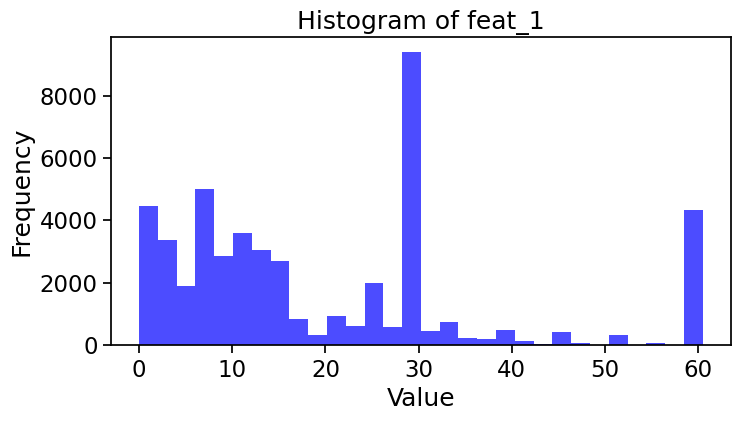

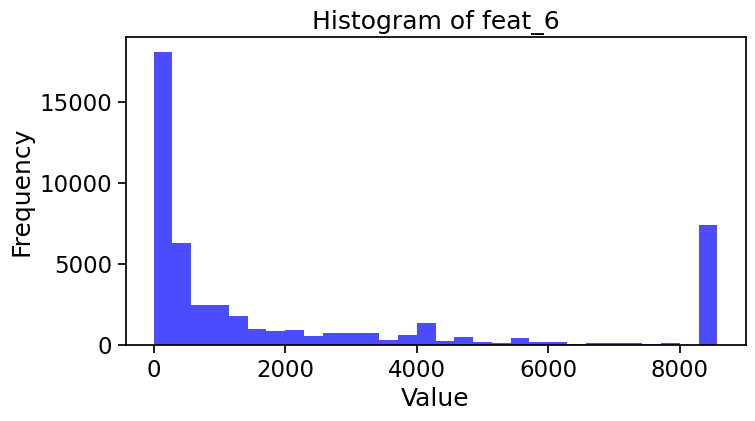

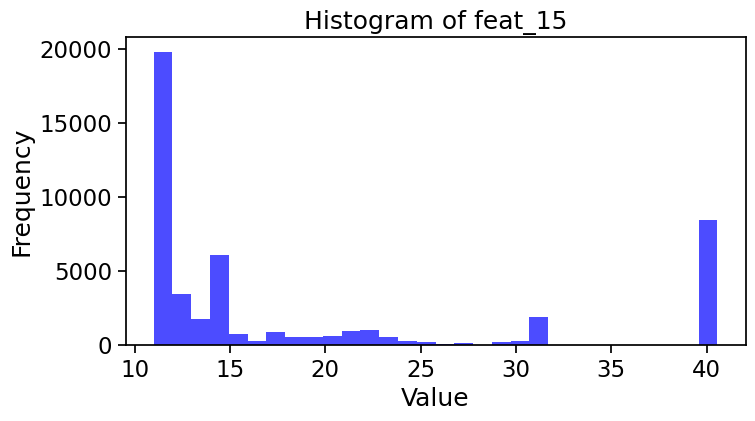

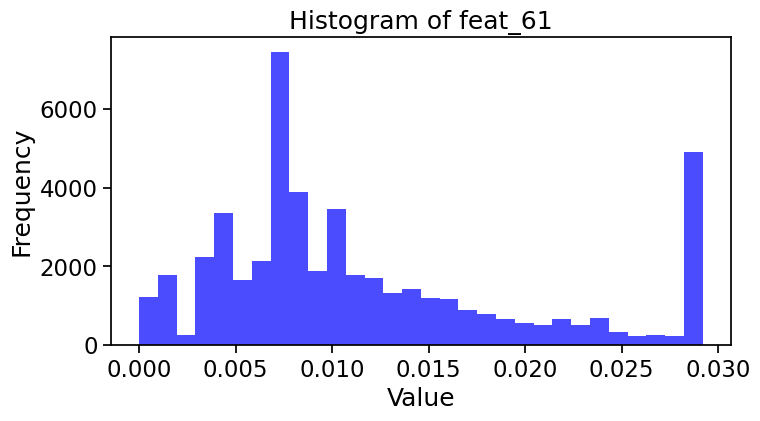

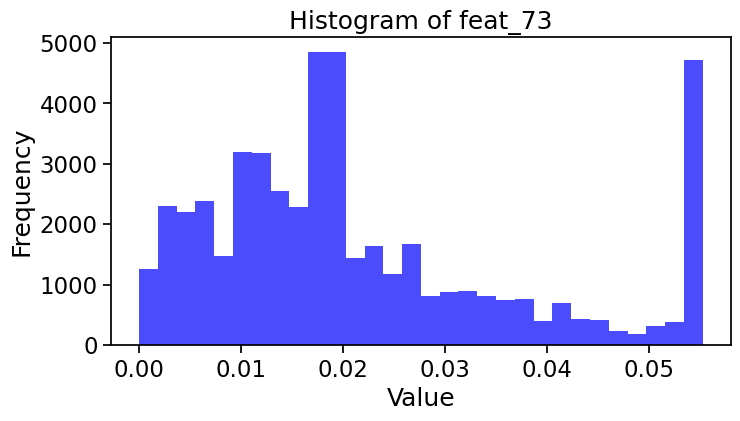

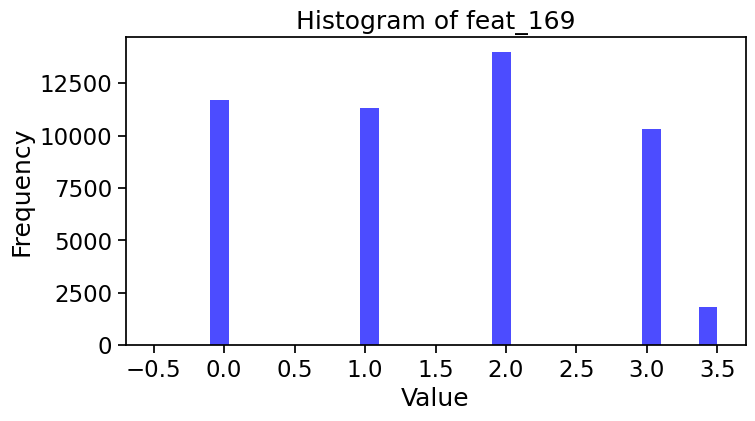

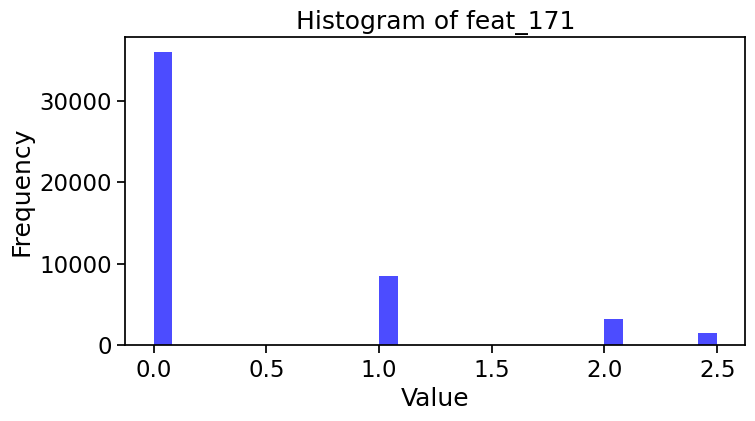

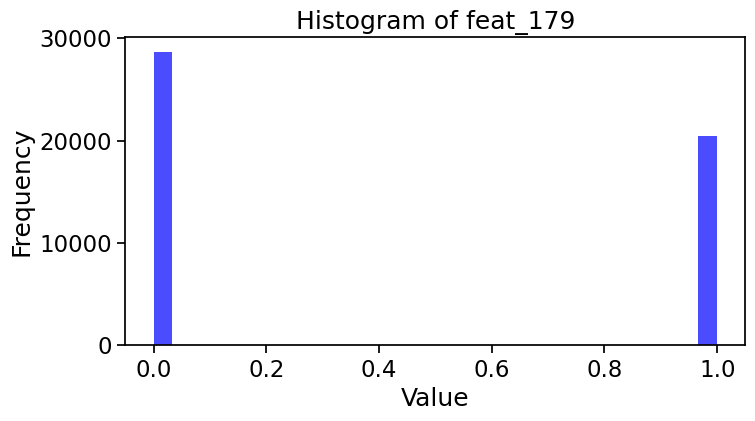

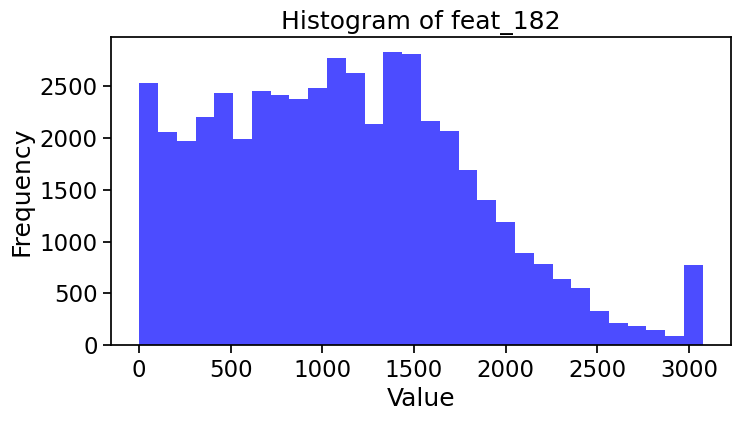

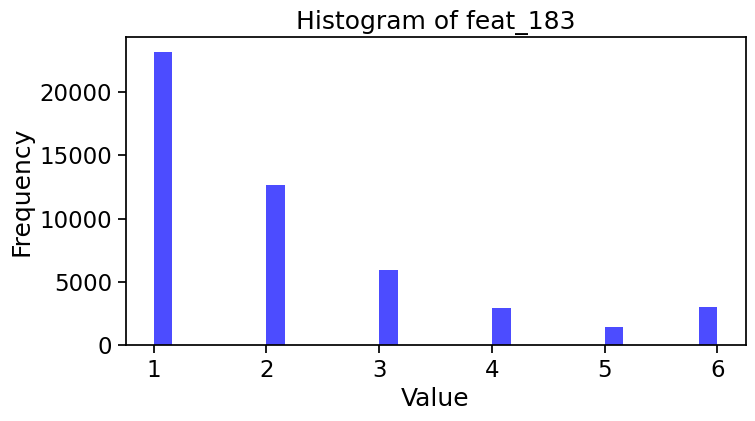

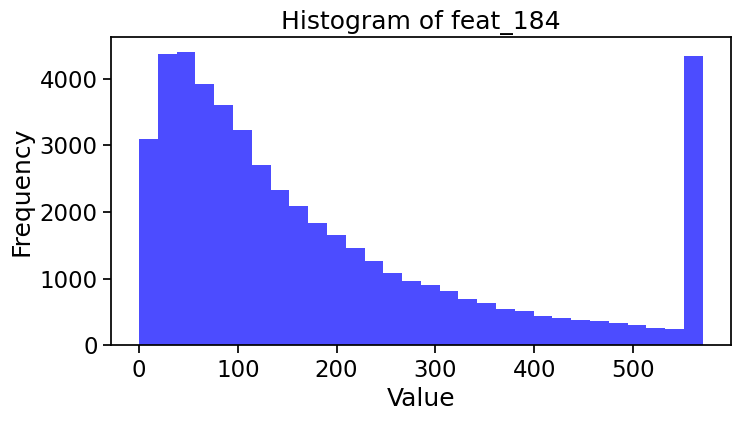

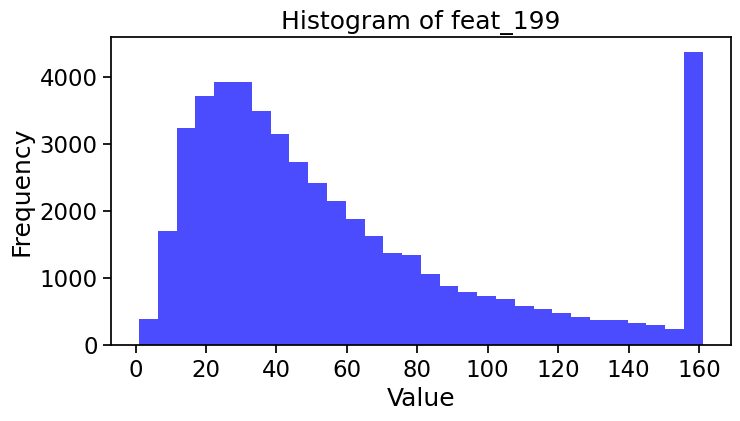

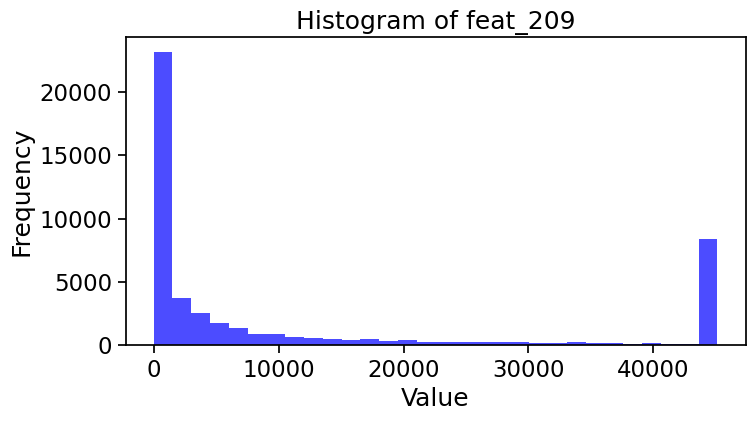

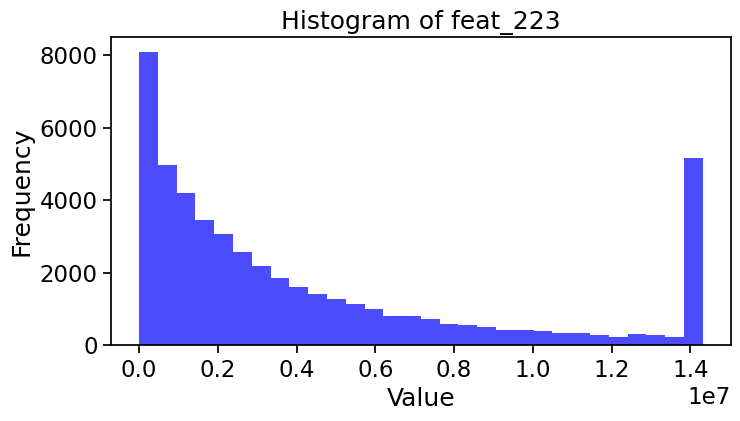

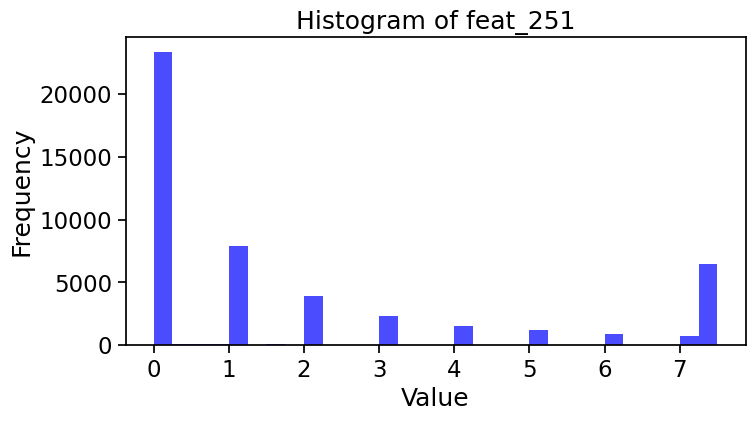

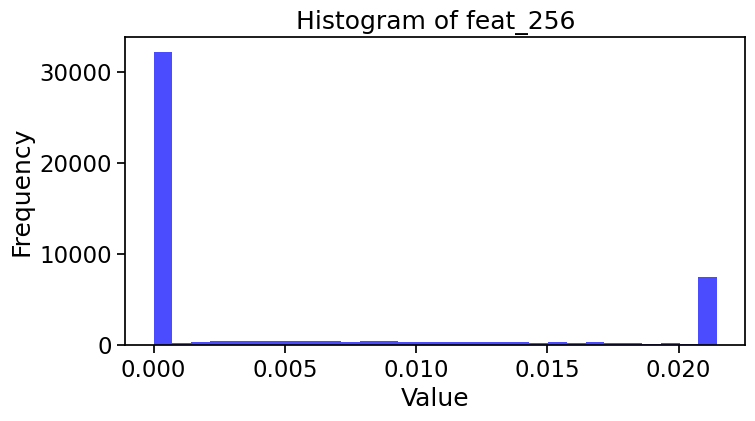

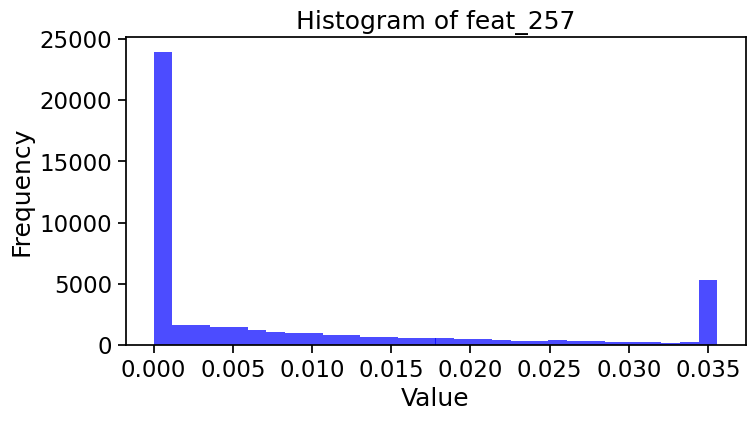

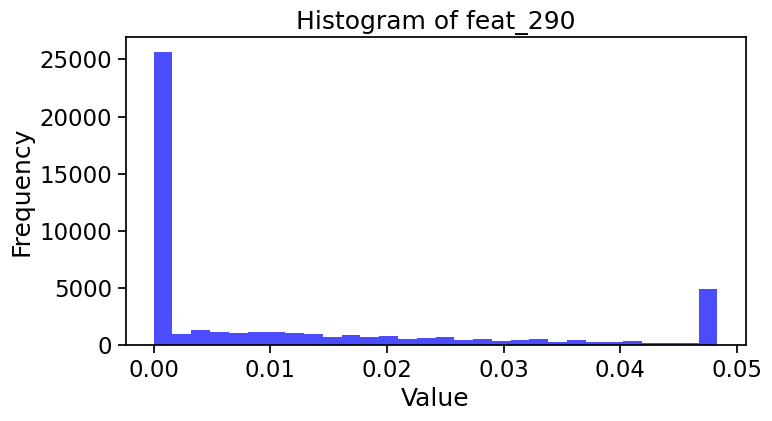

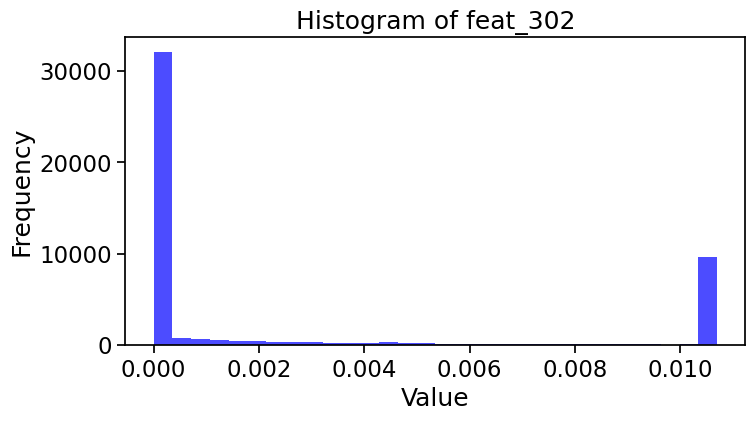

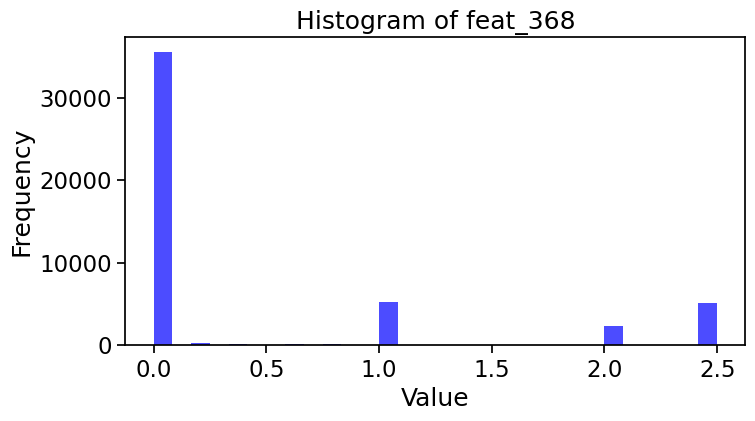

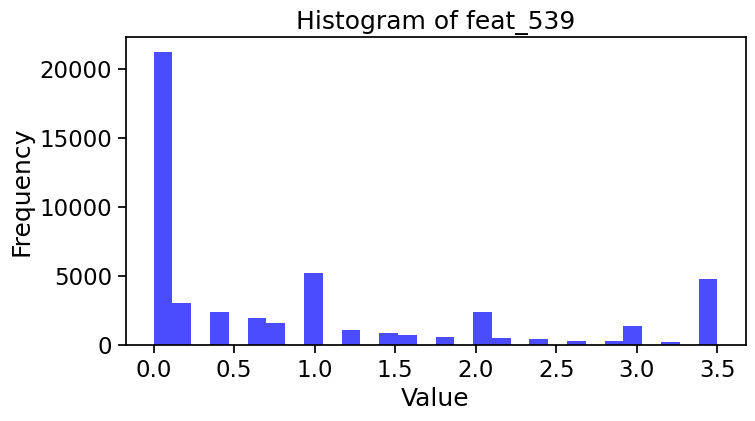

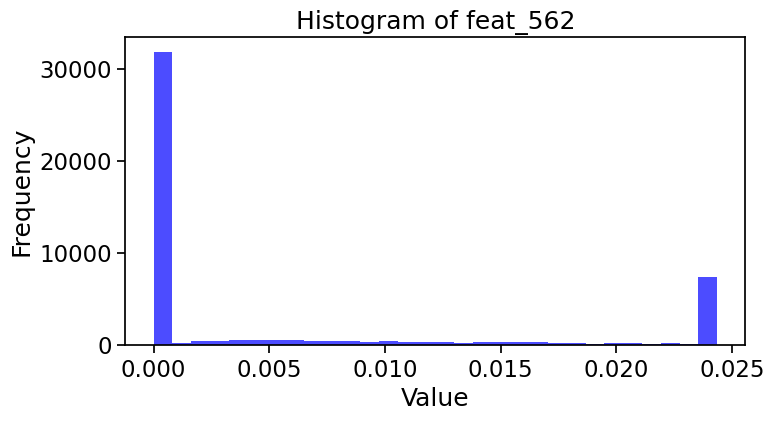

In [150]:
for column in X_test_shuf.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(X_test_shuf[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


# Check Outlier

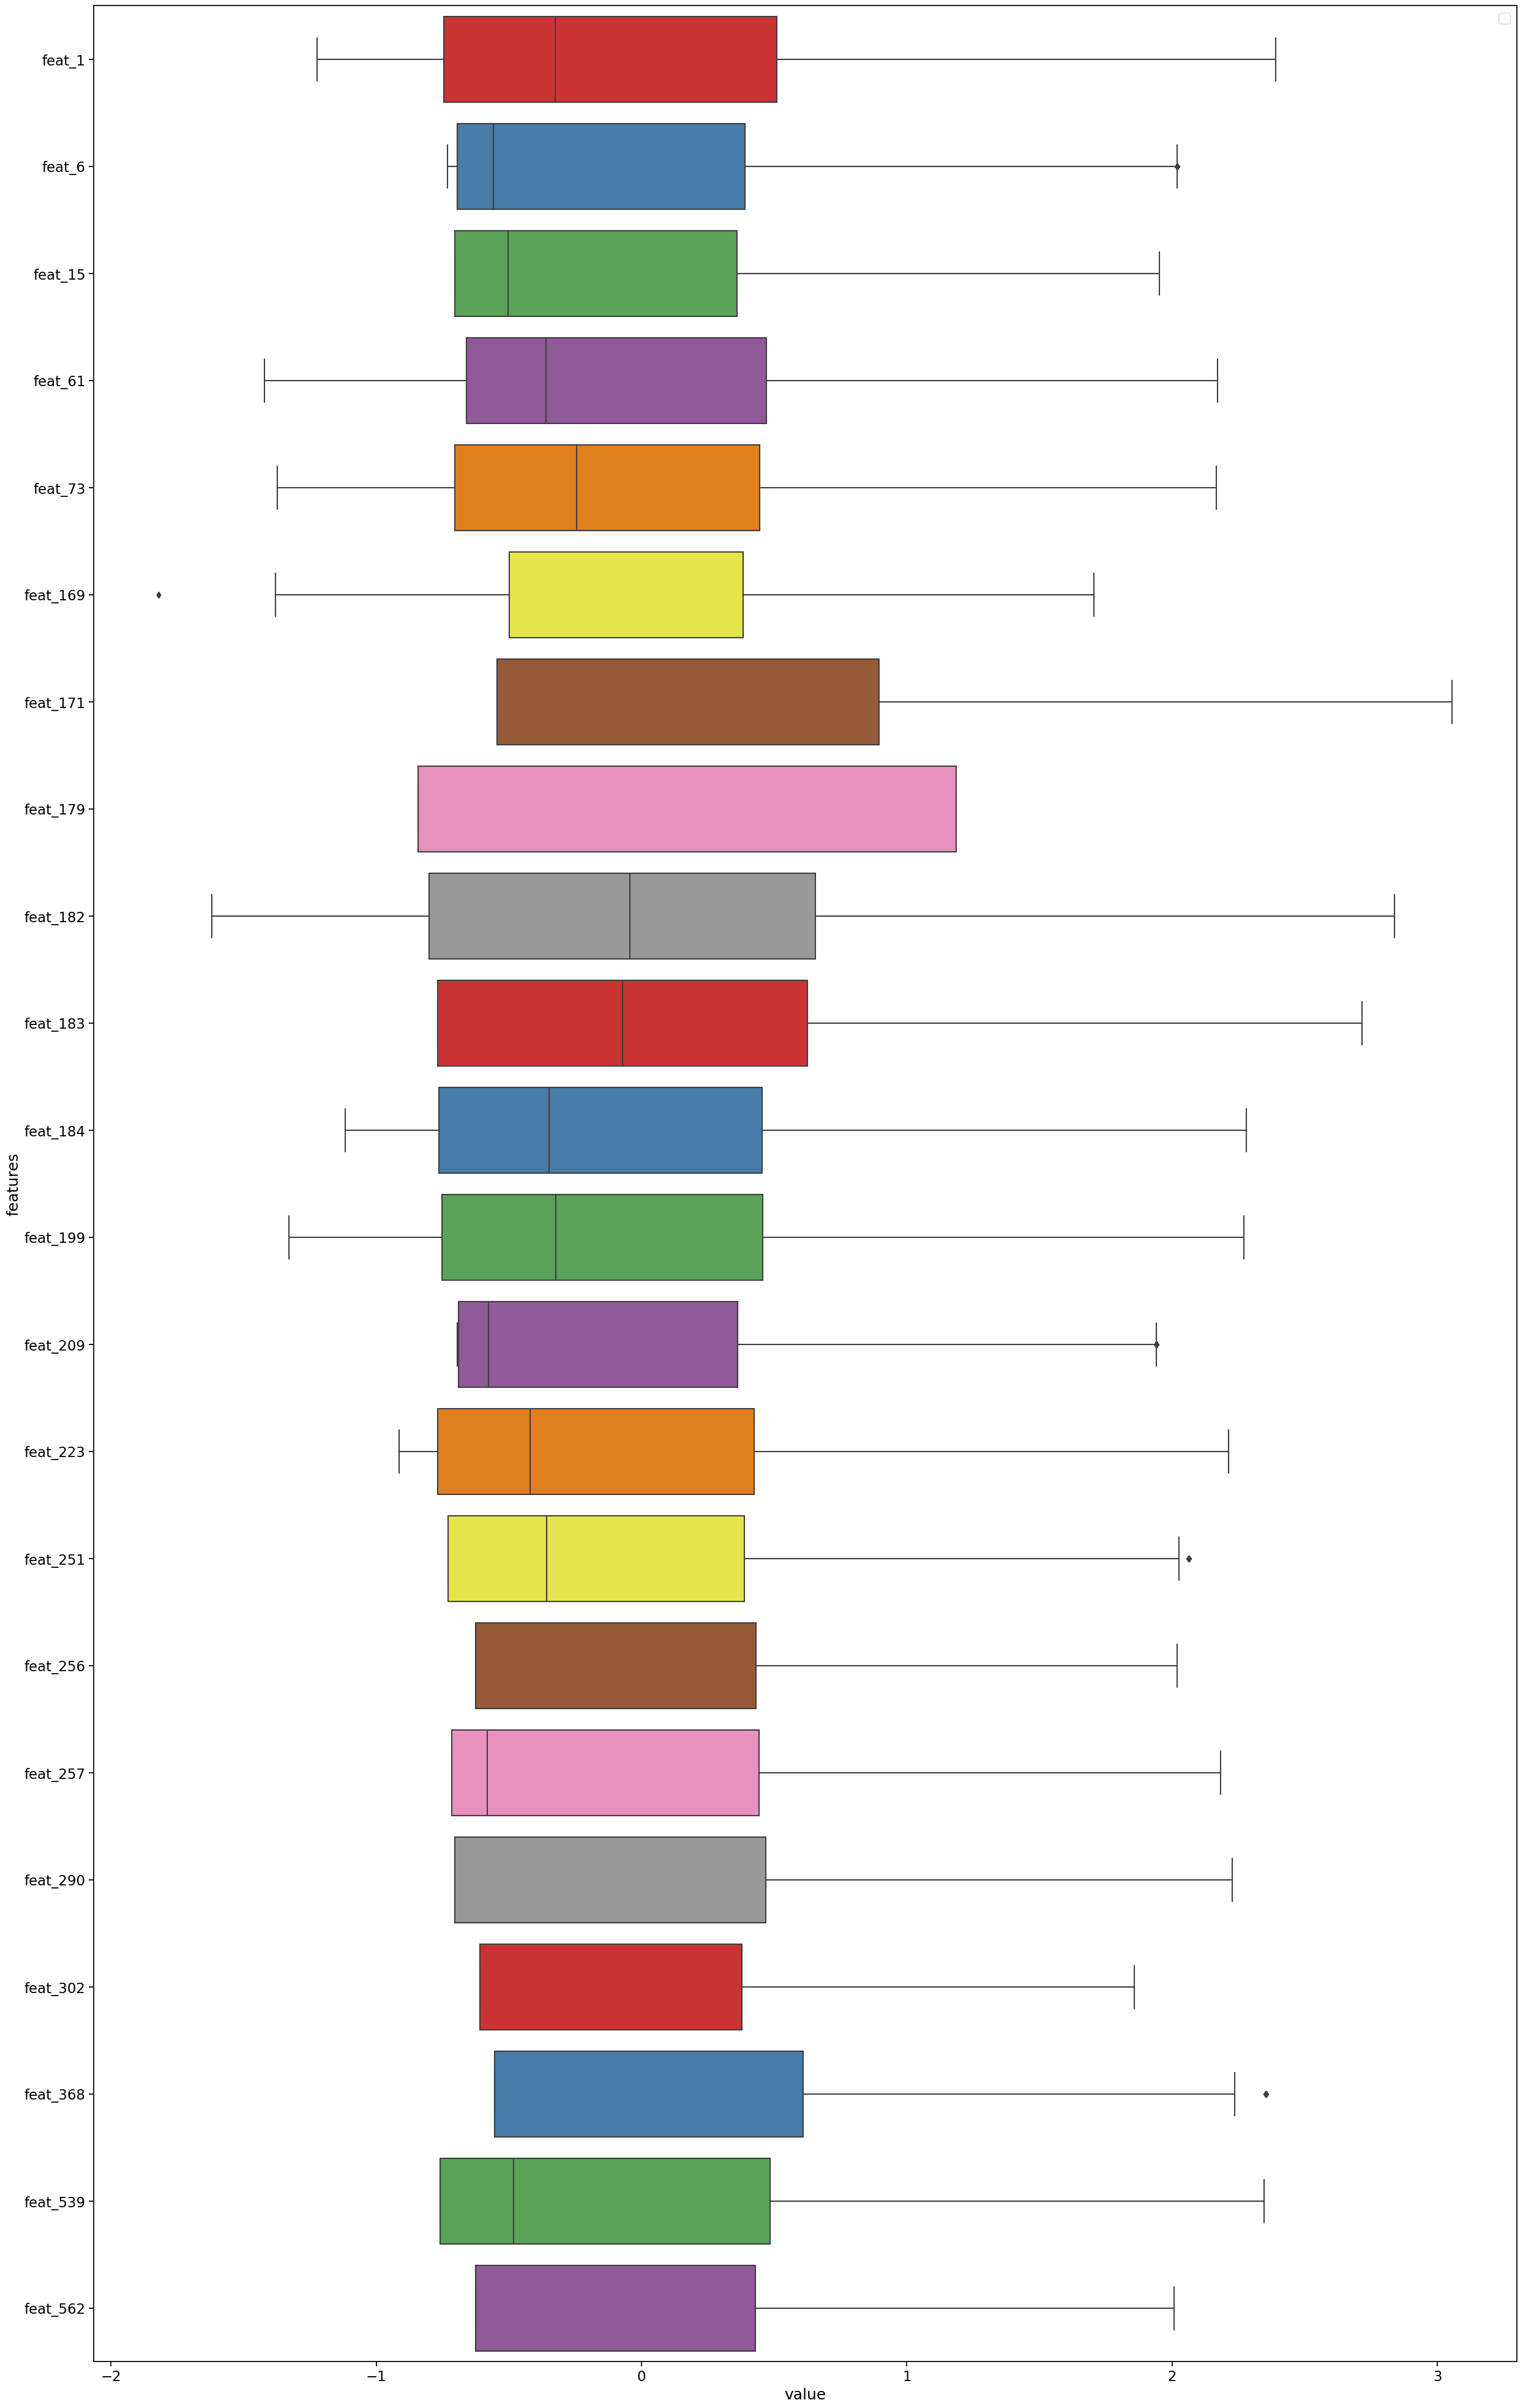

In [148]:
features=X_train_shuf
y=y_train

stdX = (features - features.mean()) / (features.std())              
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(30,50))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", data=data_st, palette='Set1')
plt.legend(loc='best')

# Standard Normalization

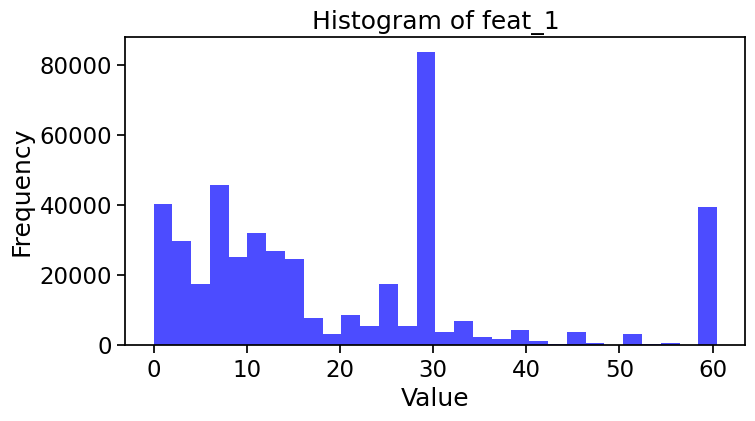

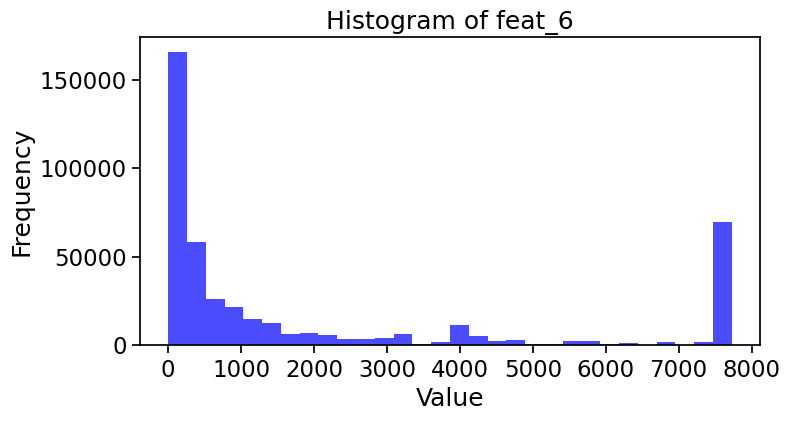

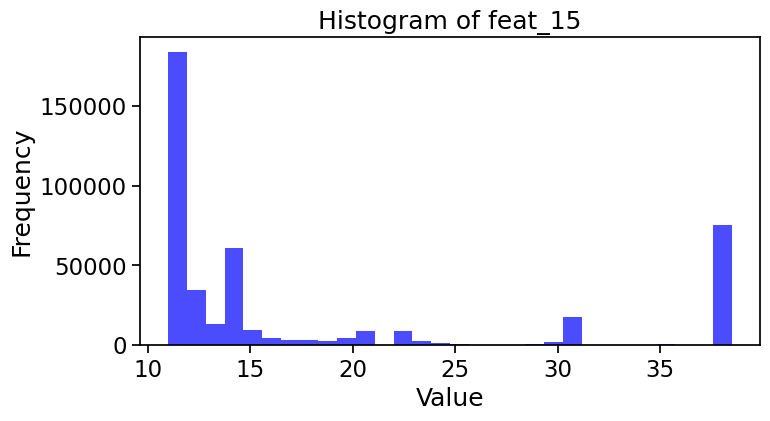

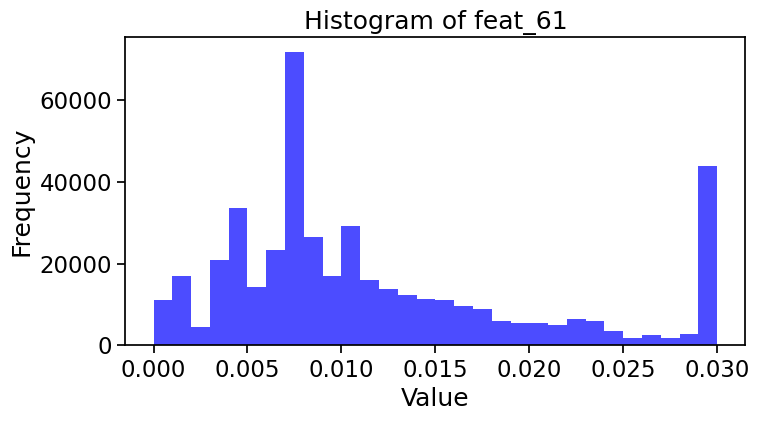

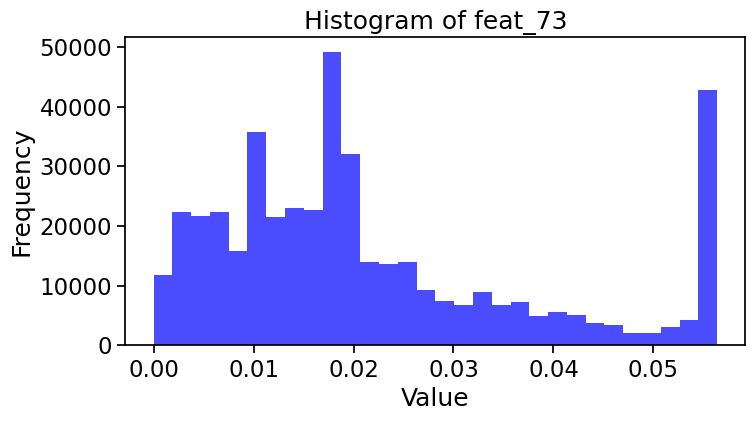

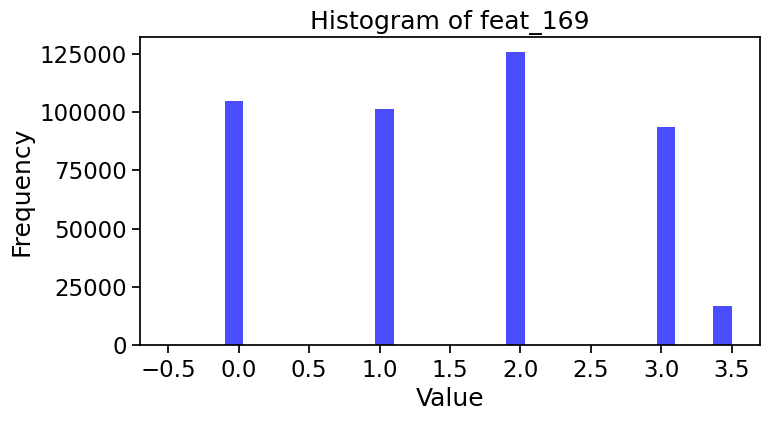

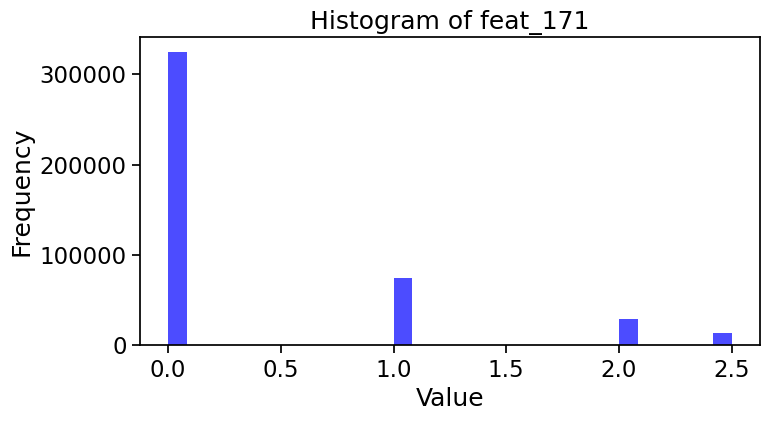

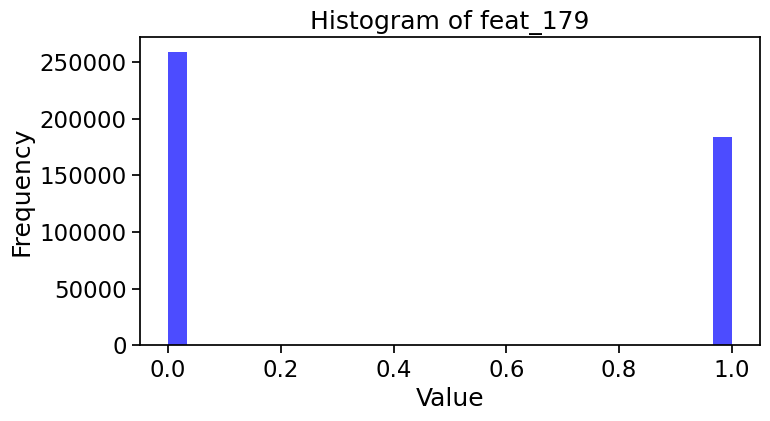

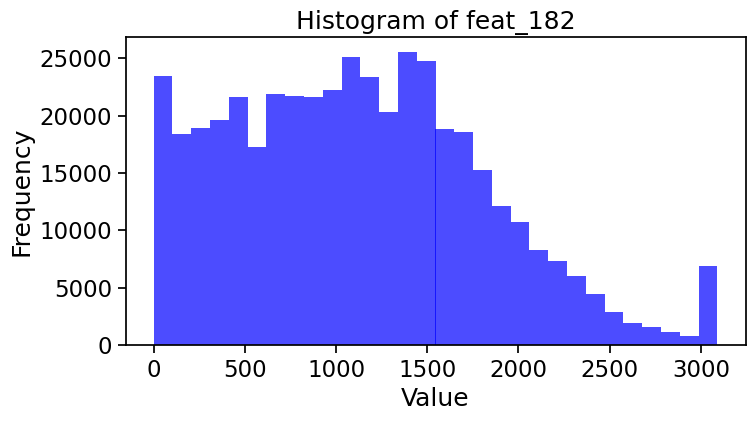

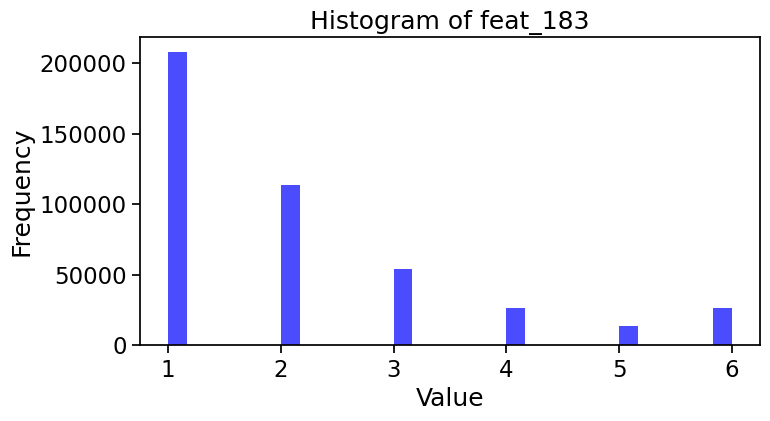

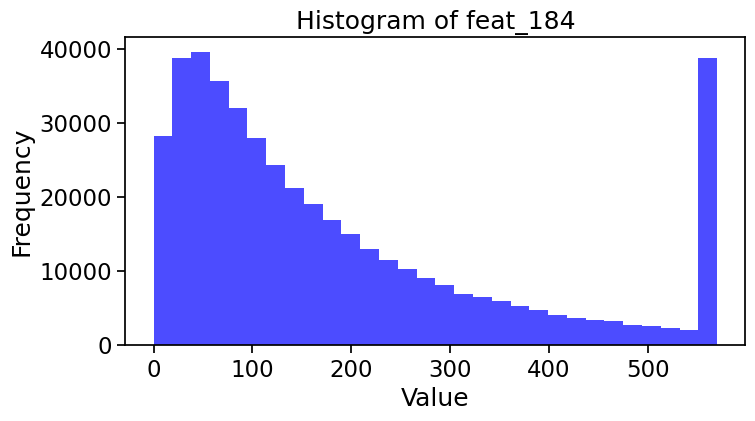

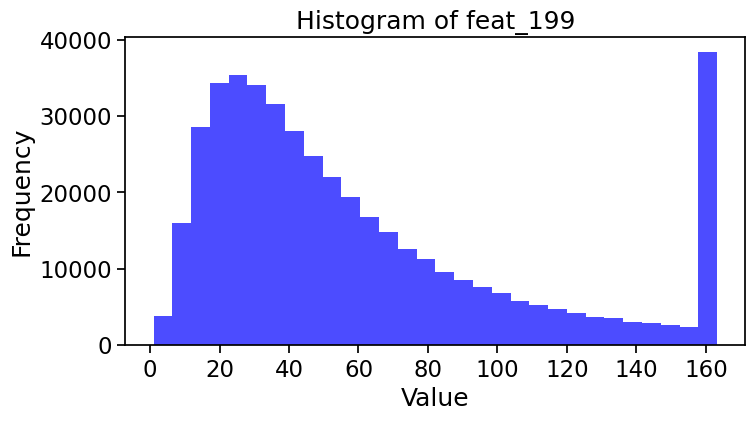

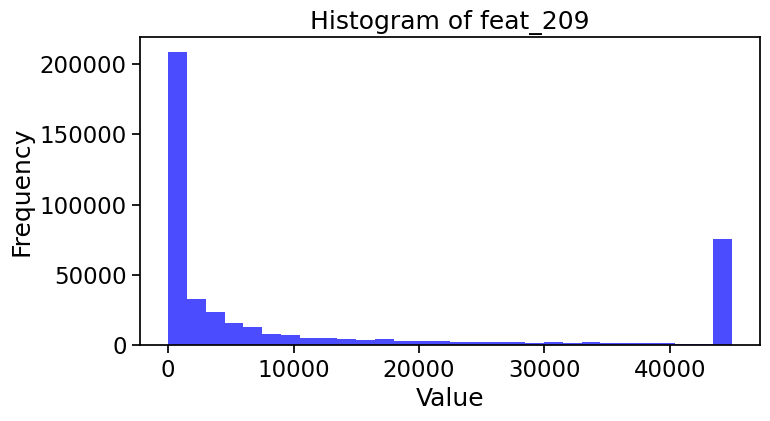

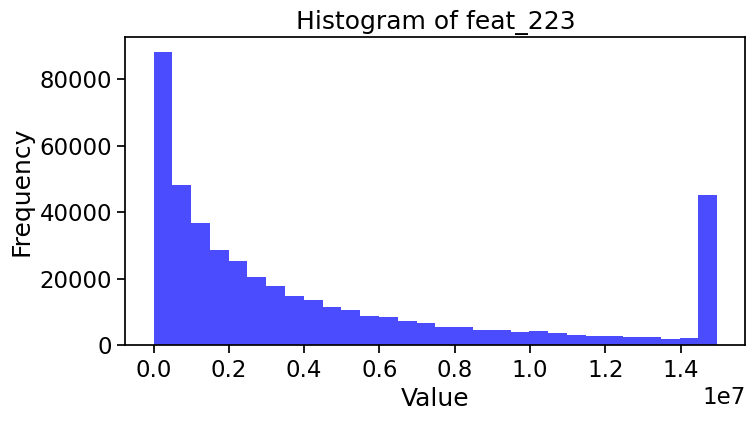

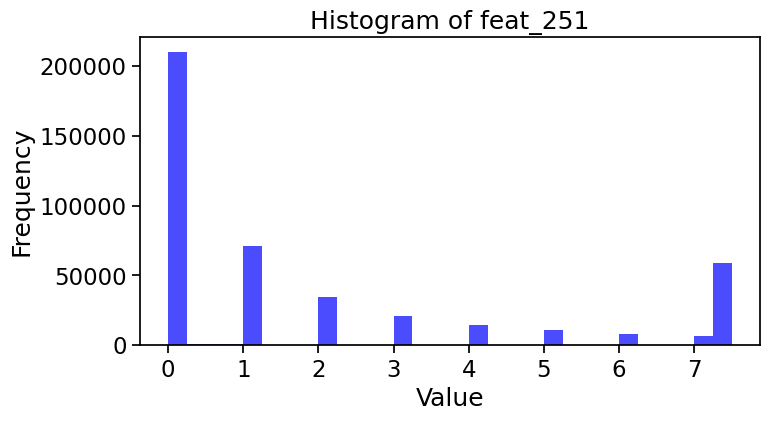

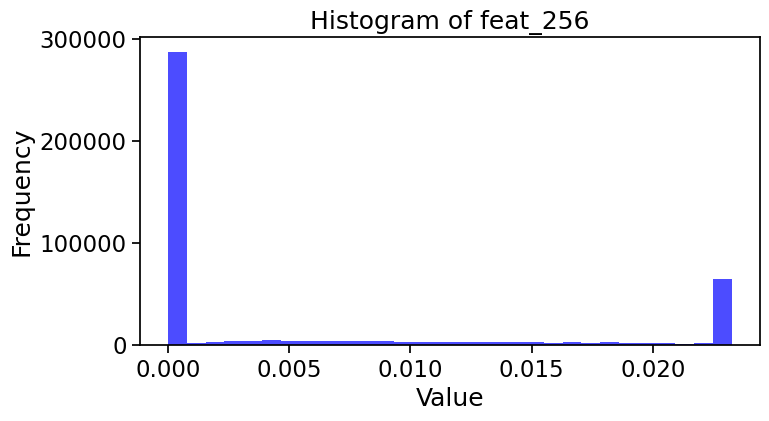

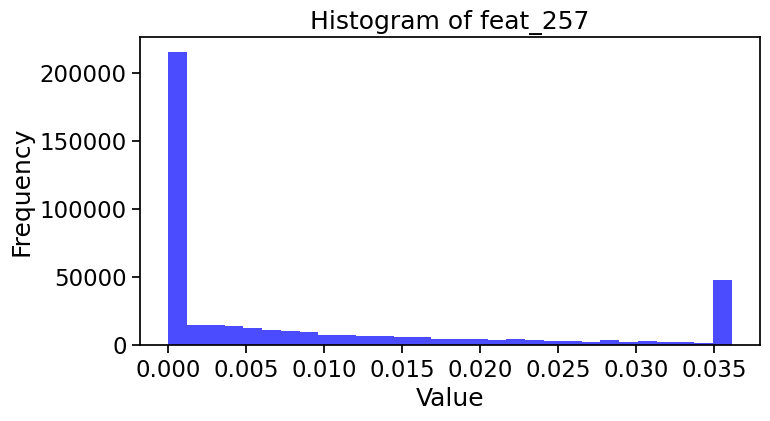

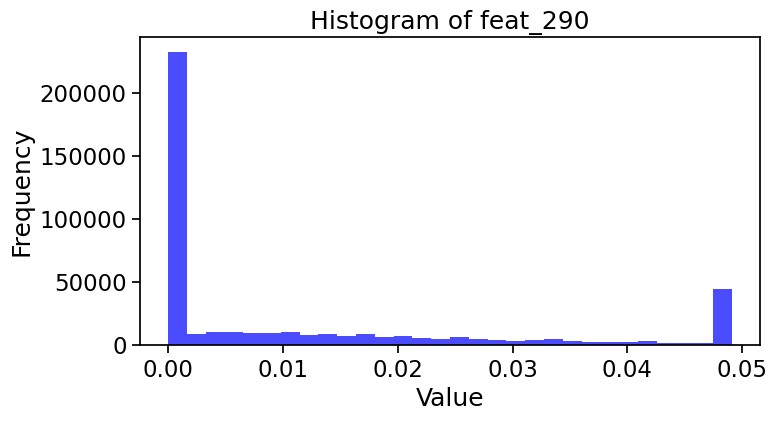

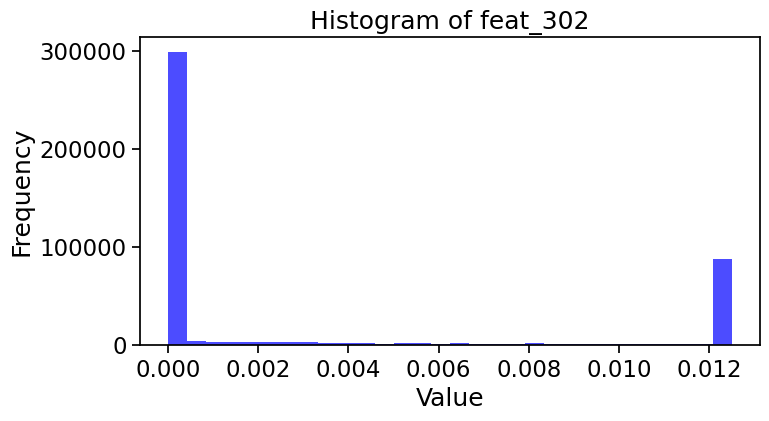

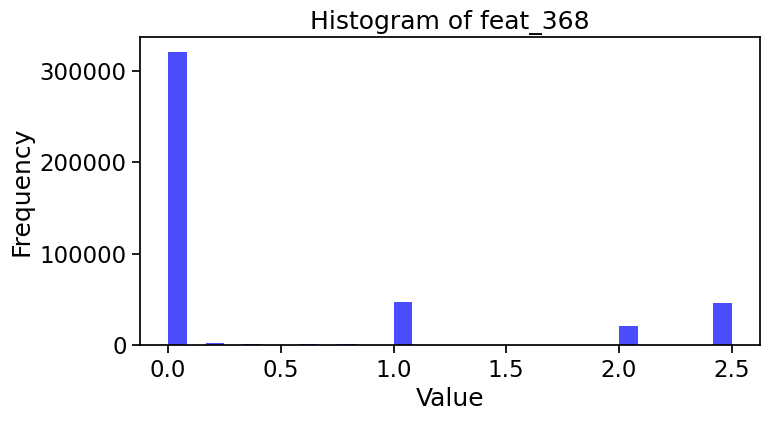

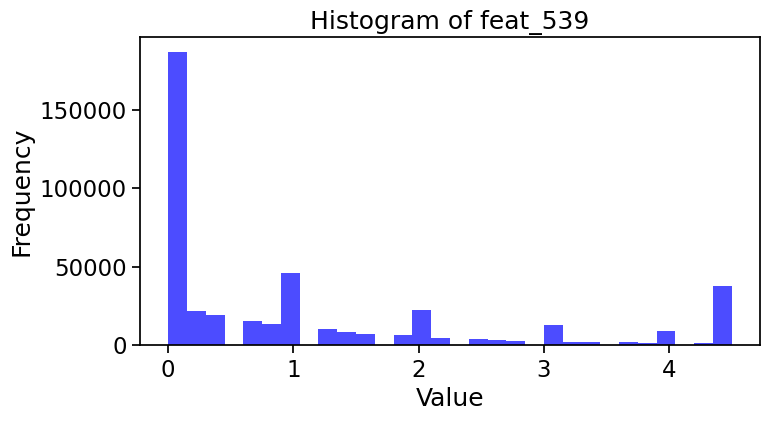

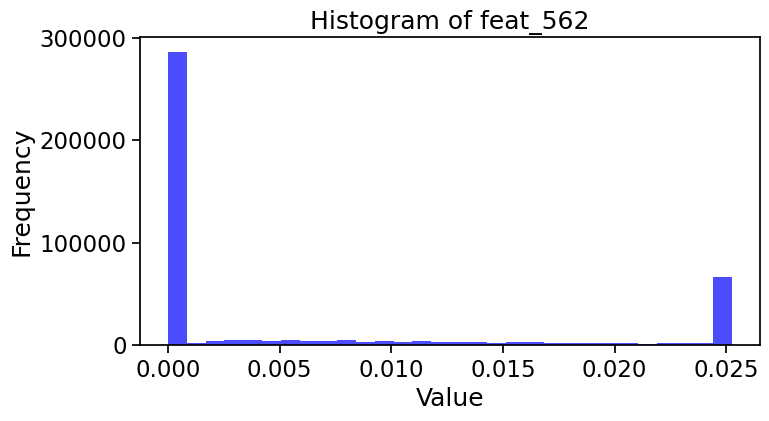

In [315]:
for column in X_train_shuf.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(X_train_shuf[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

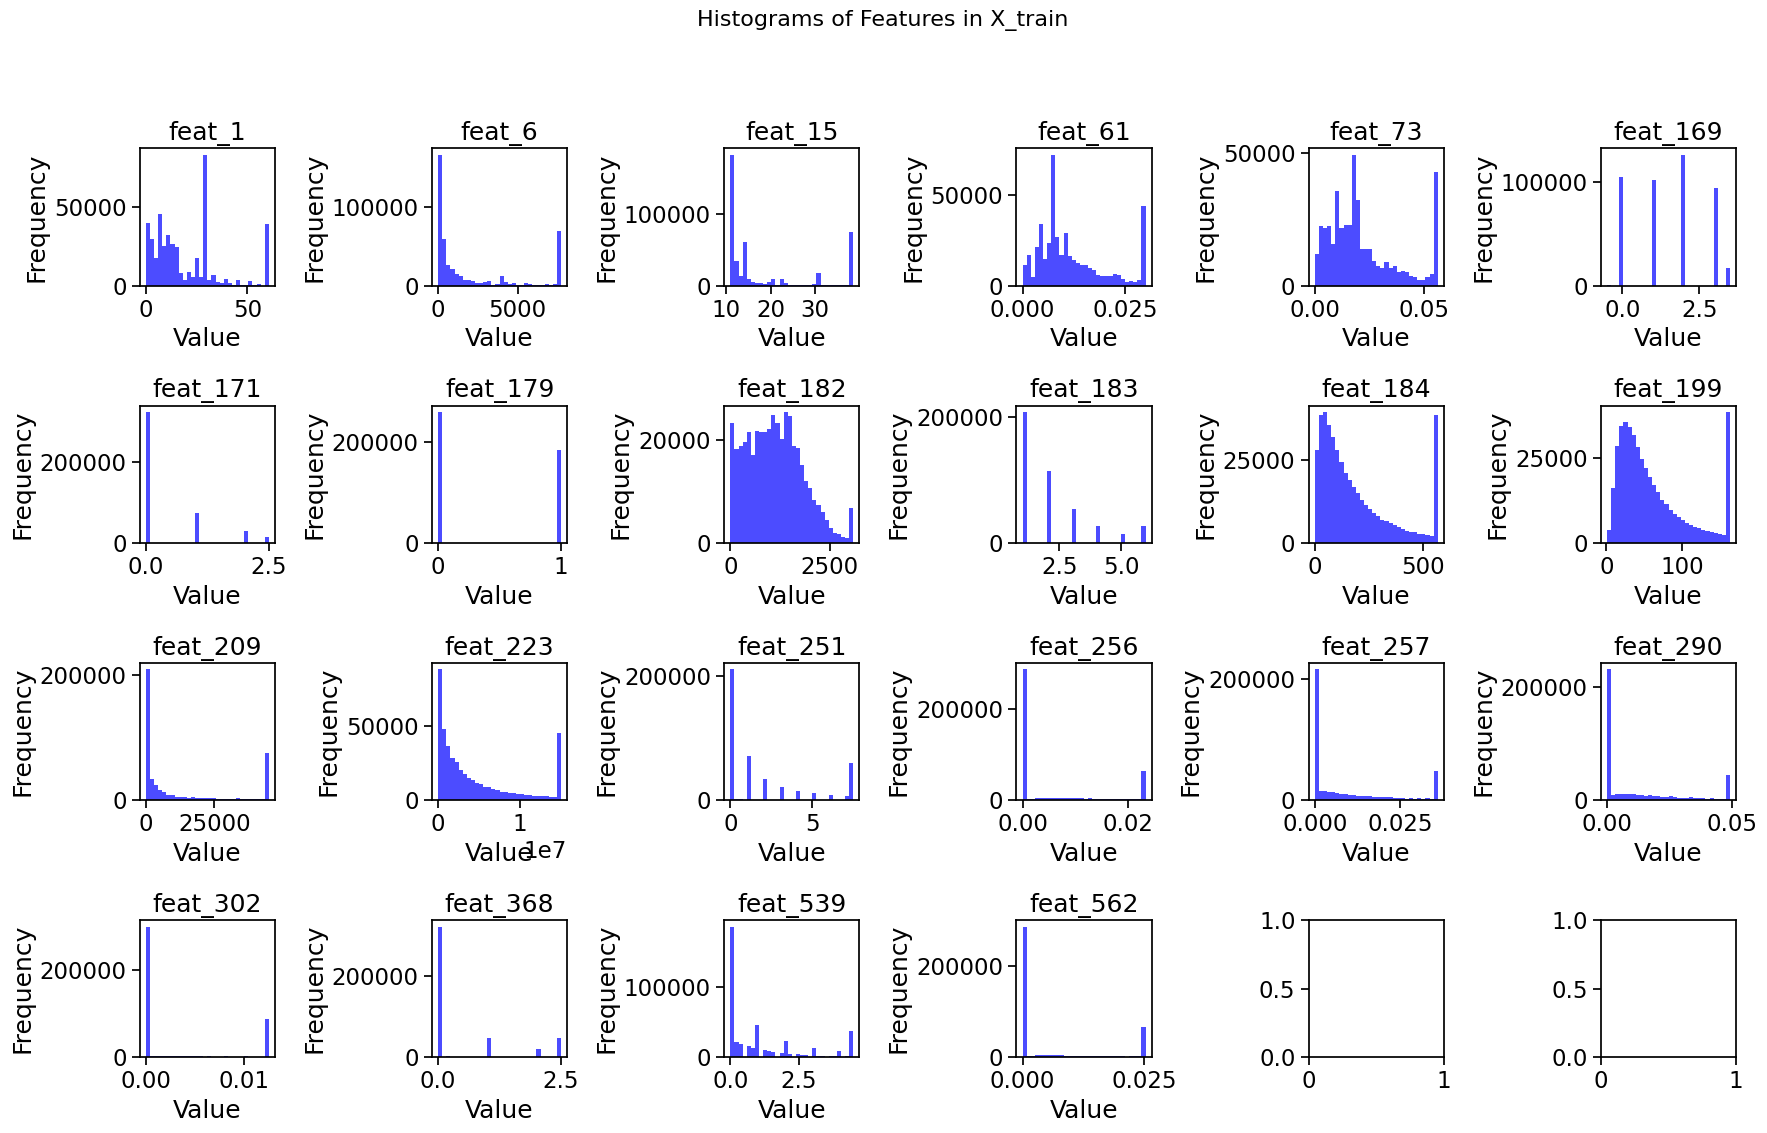

In [151]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(18, 12))
fig.suptitle('Histograms of Features in X_train', fontsize=16)

for i, column in enumerate(X_train_shuf.columns):
    row, col = divmod(i, 6)
    axes[row, col].hist(X_train_shuf[column], bins=30, color='blue', alpha=0.7)
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

# Tăng khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [152]:
scaler = StandardScaler()

In [156]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_shuf), columns=X_train_shuf.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test_shuf), columns=X_test_shuf.columns)

# Select Model

## Bagging

In [295]:
def gridsearch(X_combined_part, y_combined_part):
    param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
    }

    decision_tree = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_combined_part, y_combined_part)
    best_params = grid_search.best_params_

    return best_params



def train_model(X_train, y_train):
    
    warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.tree._classes")

    warnings.filterwarnings("ignore", category=DataConversionWarning)

 


    df=X_train.copy()
    df['label']=y_train
    df_label_0 = df[df['label'] == 0]
    df_label_1 = df[df['label'] == 1]

    num_parts = 48
    df_parts_label_0 = np.array_split(df_label_0, num_parts)
    
    # get best hyperparam
    df_combined_part = pd.concat([df_parts_label_0[0], df_label_1], ignore_index=True)

    X_combined_part = df_combined_part.drop('label', axis=1)
    y_combined_part = df_combined_part['label']
    
    models1 = []
    
    for i in range(num_parts):
        df_combined_part = pd.concat([df_parts_label_0[i], df_label_1], ignore_index=True)

        X_combined_part = df_combined_part.drop('label', axis=1)
        y_combined_part = df_combined_part['label']

        best_params=gridsearch(X_combined_part, y_combined_part)
        
        decision_tree_model = DecisionTreeClassifier(
            max_depth=best_params['max_depth'],
            min_samples_split=best_params['min_samples_split'],
            min_samples_leaf=best_params['min_samples_leaf'],
            max_features=best_params['max_features'],
            random_state=42
        )

        decision_tree_model.fit(X_combined_part, y_combined_part)
        models1.append(decision_tree_model)


        print('model number:', i)
        
    warnings.resetwarnings()

    return models1

In [296]:
models1=train_model(X_train_scaled, y_train)

model number: 0
model number: 1
model number: 2
model number: 3
model number: 4
model number: 5
model number: 6
model number: 7
model number: 8
model number: 9
model number: 10
model number: 11
model number: 12
model number: 13
model number: 14
model number: 15
model number: 16
model number: 17
model number: 18
model number: 19
model number: 20
model number: 21
model number: 22
model number: 23
model number: 24
model number: 25
model number: 26
model number: 27
model number: 28
model number: 29
model number: 30
model number: 31
model number: 32
model number: 33
model number: 34
model number: 35
model number: 36
model number: 37
model number: 38
model number: 39
model number: 40
model number: 41
model number: 42
model number: 43
model number: 44
model number: 45
model number: 46
model number: 47


In [196]:
def predict(models, X_test):
    votes_list = []

    for model in models:
        
        model_prediction = model.predict(X_test)
        votes_list.append(model_prediction)

    votes_array = np.array(votes_list)

    final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=votes_array)

    print("Final Prediction:", final_predictions)

    df_label = pd.DataFrame(final_predictions, columns=['predicted_label'])

    return df_label


In [297]:
df_label=predict(models1, X_test_scaled)

Final Prediction: [0 1 0 ... 0 0 1]


In [299]:
models1

[DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                        min_samples_split=5, random_state=42),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=10,
                        random_state=42),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=10,
                        random_state=42),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=10,
                        random_state=42),
 DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=42),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=10,
                        random_state=42),
 DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=10,
                        random_state=42),
 DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=42),
 DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=42),
 DecisionTre

In [232]:
confusion_matrix(y_test, df_label2)

array([[43655,  4527],
       [  583,   409]], dtype=int64)

In [231]:
df_label2

,predicted_label
0,0
1,0
2,0
3,0
4,0
...,...
49169,0
49170,0
49171,0
49172,0


In [200]:
df_label

,predicted_label
0,0
1,1
2,0
3,1
4,0
...,...
49169,0
49170,0
49171,0
49172,0


In [202]:
from sklearn.metrics import accuracy_score, confusion_matrix

conf_matrix = confusion_matrix(y_test, df_label)

In [203]:
conf_matrix

array([[36400, 11782],
       [  370,   622]], dtype=int64)

## XGBoost

In [205]:
def objective(trial: pd.DataFrame, X_train: pd.DataFrame, y_train: pd.DataFrame):
    
    
    params={'lambda': trial.suggest_loguniform('lambda', 1e-2, 5.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-2, 5.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01,0.012,0.014,0.016,0.018, 0.02,0.05]),
        'n_estimators': trial.suggest_int('n_estimators',50,500),
        'max_depth': trial.suggest_categorical('max_depth', [2,3,5,7,9,11]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2021]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        }
    
    f1=[]
    recall=[]
    
    kf= StratifiedKFold(n_splits=5)
     
    for train_idx,test_idx in kf.split(X_train,y_train):
        
        X_train_tuning,y_train_tuning= X_train.iloc[train_idx],y_train.iloc[train_idx]

        X_test_tuning,y_test_tuning= X_train.iloc[test_idx],y_train.iloc[test_idx]
        
        model=XGBClassifier(**params,eval_metric='auc',n_jobs=-1)
        
        model.fit(X_train_tuning,y_train_tuning)
        
        predictions=model.predict(X_test_tuning)
        
        f1.append(f1_score(y_test_tuning,predictions))
        
        
    return np.mean(f1)

In [206]:
# create the xgboost model
def create_xgb(X_train: pd.DataFrame, y_train: pd.DataFrame):
    
    """ Takes as input the training set composed of X_train and y_train. 
    It returns an xgboost model tuned with the specified training set. """
    
    study=optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50)
    
    params=study.best_params
    
    model=XGBClassifier(**params,eval_metric='auc',n_jobs=-1)
    
    model.fit(X_train, y_train, verbose=0)
    
    return model


In [207]:
def easyensemble(X_train: pd.DataFrame, y_train: pd.DataFrame, features: list, n_estimators: int):
  
    models=[]
    
    for estimator in range(1,n_estimators):
        
        undersampler= RandomUnderSampler(sampling_strategy=0.5,random_state=randint(0,100000))
        
        X_train_rus,y_train_rus= undersampler.fit_resample(X_train, y_train)
        
        models.append(create_xgb(X_train_rus,y_train_rus))
        
         
    return models


In [228]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


models=easyensemble(X_train_scaled, y_train,features,10 )
warnings.resetwarnings()



In [233]:
df_label2=predict(models, X_test_scaled)

Final Prediction: [0 0 0 ... 0 0 0]


# Evaluation 2 Model

In [237]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

def evaluate_model_performance(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")

    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Negative', 'Positive'])
    plt.yticks(tick_marks, ['Negative', 'Positive'])

    thresh = conf_matrix.max() / 2.
    for i, j in np.ndindex(conf_matrix.shape):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
    precision_points, recall_points, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall_points, precision_points)
    plt.figure()
    plt.plot(recall_points, precision_points, label=f'PR Curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="best")
    plt.show()



### Model XGBoost

Confusion Matrix:
[[43655  4527]
 [  583   409]]
Accuracy: 0.90
Precision: 0.08
Recall: 0.41
F1 Score: 0.14
ROC AUC Score: 0.66


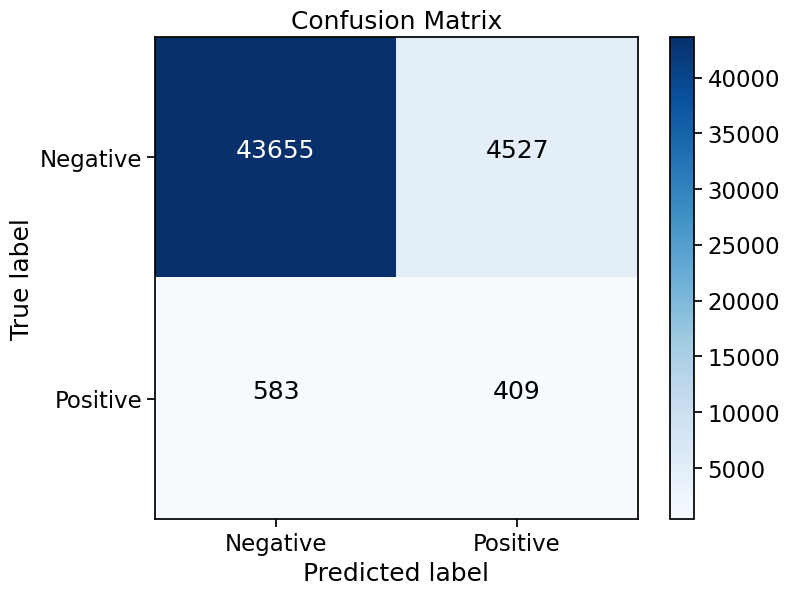

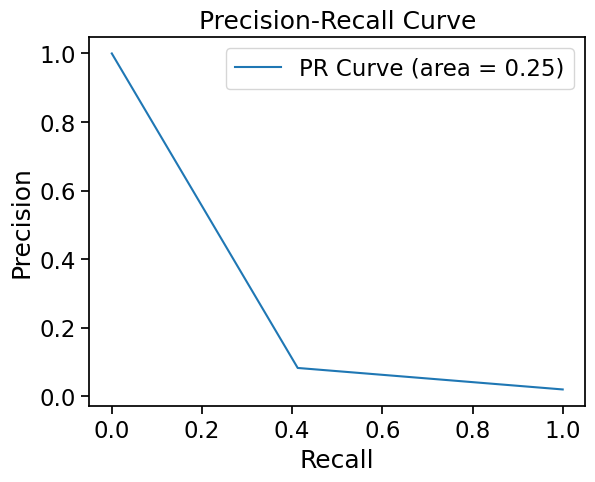

In [238]:
evaluate_model_performance(y_test, df_label2)

In [234]:
from sklearn.metrics import classification_report
print(classification_report(y_test, df_label2))

              precision    recall  f1-score   support

           0       0.99      0.91      0.94     48182
           1       0.08      0.41      0.14       992

    accuracy                           0.90     49174
   macro avg       0.53      0.66      0.54     49174
weighted avg       0.97      0.90      0.93     49174



### Model Bagging

Confusion Matrix:
[[36318 11864]
 [  365   627]]
Accuracy: 0.75
Precision: 0.05
Recall: 0.63
F1 Score: 0.09
ROC AUC Score: 0.69


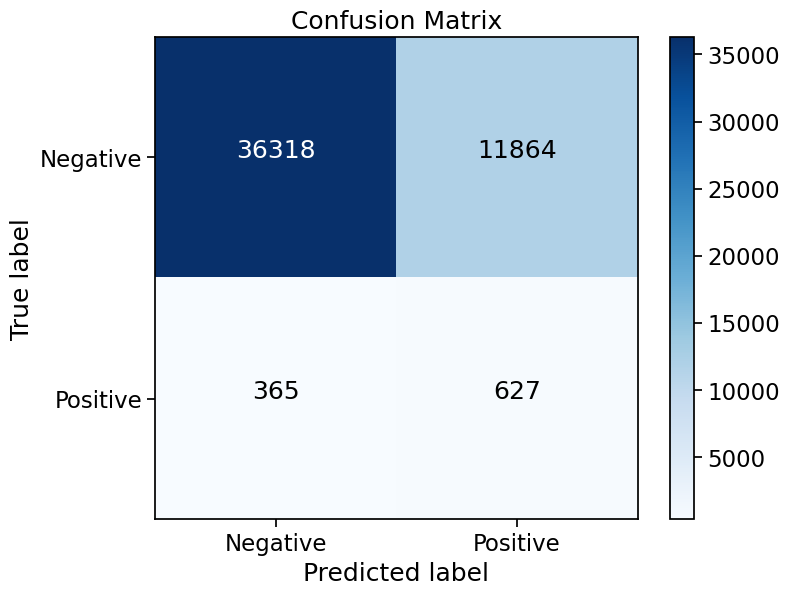

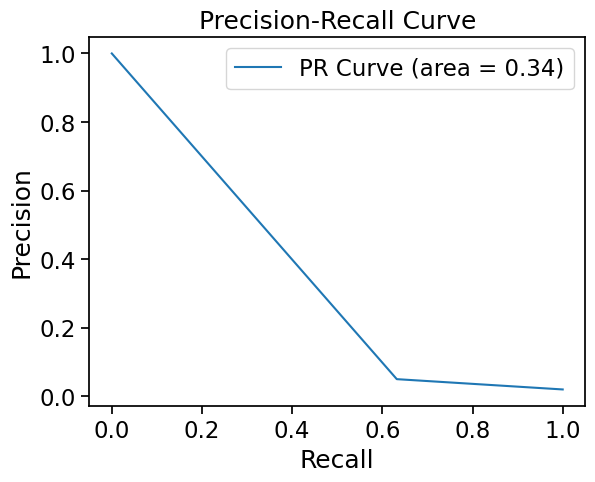

In [298]:
evaluate_model_performance(y_test, df_label)

In [235]:
print(classification_report(y_test, df_label))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     48182
           1       0.05      0.63      0.09       992

    accuracy                           0.75     49174
   macro avg       0.52      0.69      0.47     49174
weighted avg       0.97      0.75      0.84     49174



##### In general, both models have similar prediction capabilities and are not good, but the XGBoost model is slightly better in terms of its ability to handle data imbalance.

- Both models have poor prediction ability, but for this problem I just want to give some methods to solve a large number of features in an imbalanced data set.
- In the future I will release another notebook to completely overcome the data imbalance problem

# Optimize

##### Here are some methods I used to try to help the model predict better but probably didn't work.
##### You can consider reading it or not

In [250]:
X_train_op=X_train.copy()

In [260]:
X_test_op=X_test.copy()

In [251]:
X_train_op=handle_char(X_train_op)

In [261]:
X_test_op=handle_char(X_test_op)

In [252]:
X_train_op=X_train_op[X_train_scaled.columns]

In [271]:
X_test_op=X_test_op[X_train_op.columns]

In [253]:
X_train_op.head()

,feat_1,feat_6,feat_15,feat_61,feat_73,feat_169,feat_171,feat_179,feat_182,feat_183,feat_184,feat_199,feat_209,feat_223,feat_251,feat_256,feat_257,feat_290,feat_302,feat_368,feat_539,feat_562
454337,4,461.0,11.0,0.000550,0.001233,3,0,0,1817,11,75.666667,56.75,238.000000,774000.0,0.0,NaN,0.000000,NaN,NaN,0.0,NaN,0.000000
376898,7,183.0,11.0,0.010519,0.035550,0,0,0,2773,2,37.000000,27.75,8836.000000,38693500.0,0.0,0.000000,0.000000,0.000000,NaN,0.0,NaN,0.000000
346954,2,NaN,NaN,NaN,NaN,1,0,0,484,6,130.000000,39.00,6.000000,2684900.0,5.0,0.000000,0.009414,0.047059,0.000000,0.0,0.0,0.000000
422601,3,9490.0,14.0,0.024597,0.026299,2,0,1,1552,2,159.333333,119.50,237.333333,NaN,8.0,0.121324,0.104692,0.000000,0.055556,5.0,NaN,0.198413
229459,9,48.0,14.0,0.007900,0.026573,2,0,0,1459,1,24.666667,9.25,1010.000000,NaN,0.0,0.000000,0.000000,NaN,0.000000,0.0,3.0,0.000000


In [254]:
def replace_null_with_mode(column):
    mode_value = column.mode()[0]
    column.fillna(mode_value, inplace=True)
    return column

In [255]:
X_train_op = X_train_op.apply(replace_null_with_mode, axis=0)

In [272]:
X_test_op = X_test_op.apply(replace_null_with_mode, axis=0)

In [273]:
X_train_op

,feat_1,feat_6,feat_15,feat_61,feat_73,feat_169,feat_171,feat_179,feat_182,feat_183,feat_184,feat_199,feat_209,feat_223,feat_251,feat_256,feat_257,feat_290,feat_302,feat_368,feat_539,feat_562
152625,29,3942.0,40.980603,0.008175,0.019881,1,0,0,768,2,354.000000,70.800000,833.333333,10017750.0,1.0,0.002924,0.001253,0.000000,0.000000,1.0,1.0,0.000000
191613,34,22.0,31.000000,0.013260,0.015988,2,1,1,407,1,229.666667,57.416667,217.333333,10000.0,17.0,0.000000,0.057196,0.060714,0.011905,8.0,0.0,0.155994
225726,29,8932.0,40.994322,0.007852,0.019645,1,0,0,836,2,93.000000,34.875000,0.000000,500000.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
233999,29,12524.0,40.998505,0.007049,0.017675,1,0,1,747,1,139.000000,34.100000,0.000000,7100000.0,3.0,0.000000,0.011559,0.000000,0.000000,1.0,0.0,0.012500
437258,29,8771.0,40.994333,0.007489,0.018606,1,0,0,1186,2,49.666667,18.625000,242570.666667,10000.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434886,18,991.0,11.000000,0.037140,0.025050,2,0,1,168,1,9.000000,6.750000,2680.000000,10000.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
443185,45,18.0,11.000000,0.012210,0.015008,0,0,0,3185,31,98.666667,32.888889,1053.000000,306000.0,2.0,0.055556,0.038194,0.000000,0.000000,0.0,0.0,0.000000
491425,31,56861.0,11.000000,0.004472,0.011062,0,0,0,1533,2,129.000000,48.375000,39122.666667,546000.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
232886,15,431.0,11.000000,0.013912,0.040958,0,0,0,809,1,287.000000,86.100000,7018.000000,3165000.0,1.0,0.022222,0.008547,0.000000,0.000000,0.0,0.0,0.000000


In [274]:
models_ds2=train_model(X_train_op, y_train)

model number: 0
model number: 1
model number: 2
model number: 3
model number: 4
model number: 5
model number: 6
model number: 7
model number: 8
model number: 9
model number: 10
model number: 11
model number: 12
model number: 13
model number: 14
model number: 15
model number: 16
model number: 17
model number: 18
model number: 19
model number: 20
model number: 21
model number: 22
model number: 23
model number: 24
model number: 25
model number: 26
model number: 27
model number: 28
model number: 29
model number: 30
model number: 31
model number: 32
model number: 33
model number: 34
model number: 35
model number: 36
model number: 37
model number: 38
model number: 39
model number: 40
model number: 41
model number: 42
model number: 43
model number: 44
model number: 45
model number: 46
model number: 47


In [275]:
X_test_op

,feat_1,feat_6,feat_15,feat_61,feat_73,feat_169,feat_171,feat_179,feat_182,feat_183,feat_184,feat_199,feat_209,feat_223,feat_251,feat_256,feat_257,feat_290,feat_302,feat_368,feat_539,feat_562
152625,29,3942.0,40.980603,0.008175,0.019881,1,0,0,768,2,354.000000,70.800000,833.333333,10017750.0,1.0,0.002924,0.001253,0.000000,0.000000,1.0,1.0,0.000000
191613,34,22.0,31.000000,0.013260,0.015988,2,1,1,407,1,229.666667,57.416667,217.333333,10000.0,17.0,0.000000,0.057196,0.060714,0.011905,8.0,0.0,0.155994
225726,29,8932.0,40.994322,0.007852,0.019645,1,0,0,836,2,93.000000,34.875000,0.000000,500000.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
233999,29,12524.0,40.998505,0.007049,0.017675,1,0,1,747,1,139.000000,34.100000,0.000000,7100000.0,3.0,0.000000,0.011559,0.000000,0.000000,1.0,0.0,0.012500
437258,29,8771.0,40.994333,0.007489,0.018606,1,0,0,1186,2,49.666667,18.625000,242570.666667,10000.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434886,18,991.0,11.000000,0.037140,0.025050,2,0,1,168,1,9.000000,6.750000,2680.000000,10000.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
443185,45,18.0,11.000000,0.012210,0.015008,0,0,0,3185,31,98.666667,32.888889,1053.000000,306000.0,2.0,0.055556,0.038194,0.000000,0.000000,0.0,0.0,0.000000
491425,31,56861.0,11.000000,0.004472,0.011062,0,0,0,1533,2,129.000000,48.375000,39122.666667,546000.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
232886,15,431.0,11.000000,0.013912,0.040958,0,0,0,809,1,287.000000,86.100000,7018.000000,3165000.0,1.0,0.022222,0.008547,0.000000,0.000000,0.0,0.0,0.000000


In [277]:
import numpy as np
import pandas as pd

def predict(models, X_test):
    votes_list = []

    for model in models:
        # Assuming model.predict returns class labels as integers
        model_prediction = model.predict(X_test).astype(int)  # Ensure integer predictions
        votes_list.append(model_prediction)

    votes_array = np.array(votes_list)

    # Use the mode function to find the most common prediction for each sample
    final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=votes_array)

    print("Final Prediction:", final_predictions)

    df_label = pd.DataFrame(final_predictions, columns=['predicted_label'])

    return df_label


In [278]:
df_label3=predict(models_ds2, X_test_op)

Final Prediction: [0 0 0 ... 1 0 0]


Confusion Matrix:
[[33632 14550]
 [  714   278]]
Accuracy: 0.69
Precision: 0.02
Recall: 0.28
F1 Score: 0.04
ROC AUC Score: 0.49


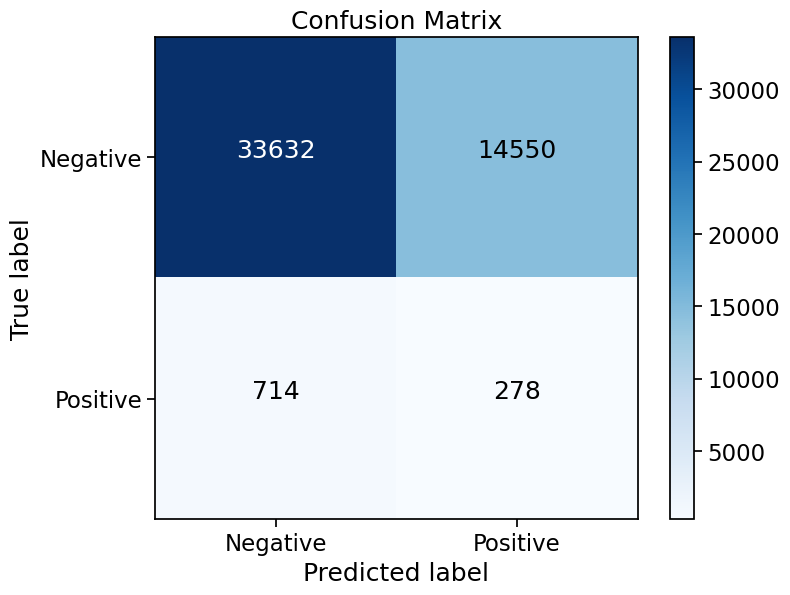

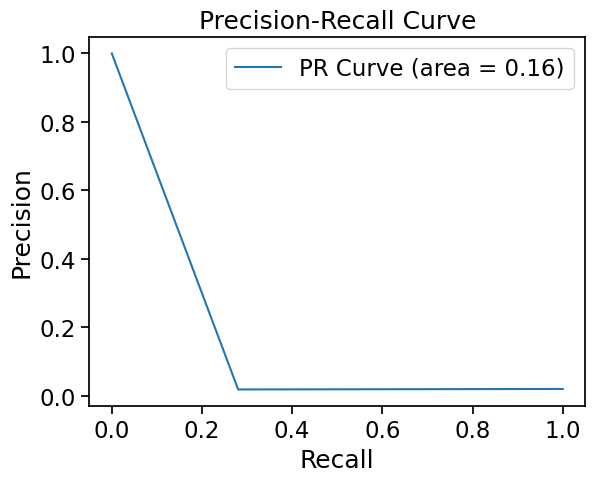

In [280]:
evaluate_model_performance(y_test, df_label3)

In [281]:
#############

In [282]:
X_train_op=X_train_null[X_train_scaled.columns]

In [285]:
X_test_op=X_test.copy()
X_test_op=handle_char(X_test_op)

In [286]:
X_test_op=X_test[X_train_scaled.columns]

In [287]:
X_test_op=handle_null(X_test_shuf)

50
0
10
20
30
40


C:\Users\ngois\AppData\Local\Temp\ipykernel_10280\495819781.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[start_idx:end_idx, :] = imputed_batch
C:\Users\ngois\AppData\Local\Temp\ipykernel_10280\495819781.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[start_idx:end_idx, :] = imputed_batch
C:\Users\ngois\AppData\Local\Temp\ipykernel_10280\495819781.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[

In [288]:
models_ds3=train_model(X_train_op, y_train)

model number: 0
model number: 1
model number: 2
model number: 3
model number: 4
model number: 5
model number: 6
model number: 7
model number: 8
model number: 9
model number: 10
model number: 11
model number: 12
model number: 13
model number: 14
model number: 15
model number: 16
model number: 17
model number: 18
model number: 19
model number: 20
model number: 21
model number: 22
model number: 23
model number: 24
model number: 25
model number: 26
model number: 27
model number: 28
model number: 29
model number: 30
model number: 31
model number: 32
model number: 33
model number: 34
model number: 35
model number: 36
model number: 37
model number: 38
model number: 39
model number: 40
model number: 41
model number: 42
model number: 43
model number: 44
model number: 45
model number: 46
model number: 47


In [289]:
df_label4=predict(models_ds2, X_test_op)

Final Prediction: [0 1 0 ... 1 0 0]


Confusion Matrix:
[[29416 18766]
 [  612   380]]
Accuracy: 0.61
Precision: 0.02
Recall: 0.38
F1 Score: 0.04
ROC AUC Score: 0.50


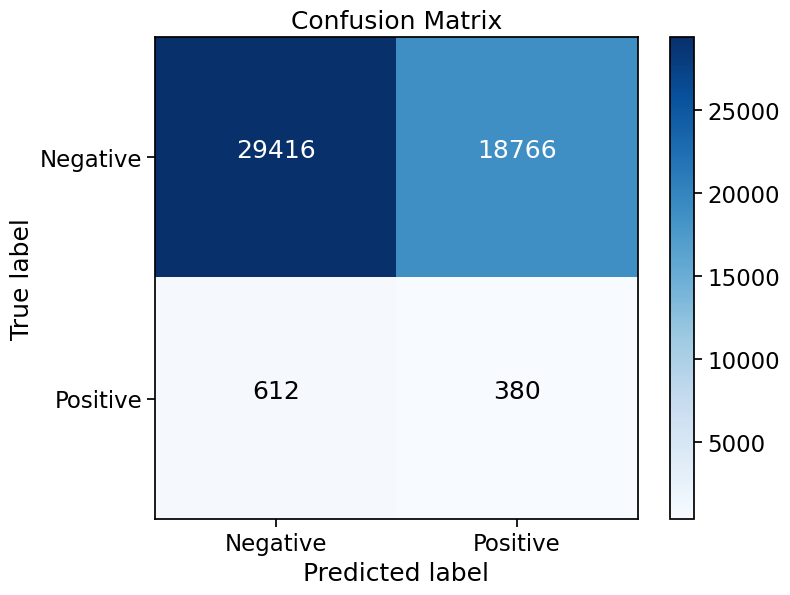

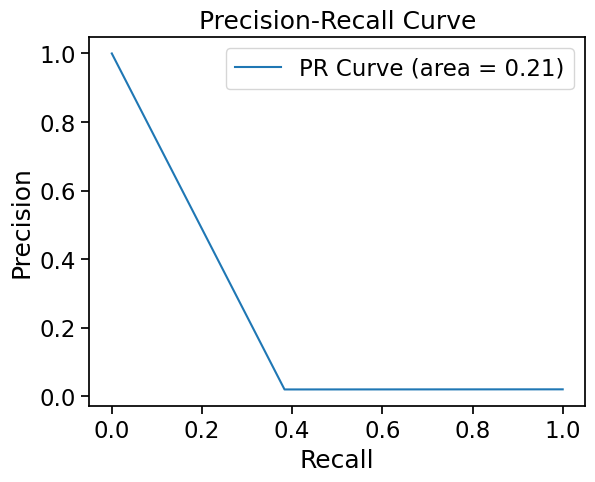

In [290]:
evaluate_model_performance(y_test, df_label4)